#데이터

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from IPython.display import Image
from numpy import interp
import scipy.stats

In [76]:
df = pd.read_csv("C:/Users/USER/Downloads/week1.csv")
df.head()

X1        X2        X3        X4        X5        X6        X7  \
0  0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
1  0.006836  0.007688  0.597304  0.015348  0.686838  0.067407  0.347869   
2  0.609621  0.001461  0.466186  0.015348  0.693090  0.018944  0.345032   
3  0.074007  0.003072  0.535876  0.015348  0.693147  0.031475  0.347502   
4  0.198356  0.007020  0.416238  0.015348  0.686838  0.061888  0.347441   

         X8        X9       X10  ...       X12       X13       X14       X15  \
0  0.028087  0.681974  0.295769  ...  0.682731  0.249262  0.681974  0.016330   
1  0.028640  0.497403  0.297943  ...  0.680891  0.249262  0.497403  0.670040   
2  0.024502  0.647685  0.298255  ...  0.685525  0.249262  0.647685  0.648486   
3  0.025393  0.587787  0.296057  ...  0.677980  0.249262  0.575364  0.632563   
4  0.028450  0.537143  0.298167  ...  0.673286  0.249262  0.537143  0.671124   

        X16       X17       X18       X19       X20  Y  
0  0.242926  0.557461  0.028087  0.682731  0.036360  0  
1  0.245876  0.561336  0.028640  0.680891  0.067407  0  
2  0.243602  0.559431  0.024502  0.685525  0.018944  0  
3  0.246078  0.556761  0.025393  0.677980  0.031475  0  
4  0.245505  0.561695  0.028450  0.673286  0.061888  0  

[5 rows x 21 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527000 entries, 0 to 526999
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      527000 non-null  float64
 1   X2      527000 non-null  float64
 2   X3      527000 non-null  float64
 3   X4      527000 non-null  float64
 4   X5      527000 non-null  float64
 5   X6      527000 non-null  float64
 6   X7      527000 non-null  float64
 7   X8      527000 non-null  float64
 8   X9      527000 non-null  float64
 9   X10     527000 non-null  float64
 10  X11     527000 non-null  float64
 11  X12     527000 non-null  float64
 12  X13     527000 non-null  float64
 13  X14     527000 non-null  float64
 14  X15     527000 non-null  float64
 15  X16     527000 non-null  float64
 16  X17     527000 non-null  float64
 17  X18     527000 non-null  float64
 18  X19     527000 non-null  float64
 19  X20     527000 non-null  float64
 20  Y       527000 non-null  int64  
dtypes: float64

In [31]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
Y      0
dtype: int64

In [32]:
df.describe()

X1             X2             X3            X4  \
count  527000.000000  527000.000000  527000.000000  5.270000e+05   
mean        0.375129       0.003963       0.455679  1.534800e-02   
std         0.200043       0.004316       0.105150  2.081670e-17   
min         0.000000       0.000000       0.000000  1.534800e-02   
25%         0.204692       0.002366       0.415990  1.534800e-02   
50%         0.399744       0.003523       0.435739  1.534800e-02   
75%         0.545196       0.005094       0.530429  1.534800e-02   
max         0.693147       0.693147       0.693147  1.534800e-02   

                  X5             X6             X7             X8  \
count  527000.000000  527000.000000  527000.000000  527000.000000   
mean        0.638446       0.037449       0.348374       0.025152   
std         0.139334       0.016994       0.028971       0.003820   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.688810       0.026023       0.344457       0.024164   
50%         0.693147       0.034280       0.345721       0.025805   
75%         0.693147       0.048085       0.346949       0.028069   
max         0.693147       0.693147       0.693147       0.693147   

                  X9            X10  ...            X12           X13  \
count  527000.000000  527000.000000  ...  527000.000000  5.270000e+05   
mean        0.602939       0.299989  ...       0.680077  2.492619e-01   
std         0.071272       0.033502  ...       0.005244  1.387780e-16   
min         0.000000       0.000000  ...       0.000000  2.492619e-01   
25%         0.562785       0.295929  ...       0.676136  2.492619e-01   
50%         0.624154       0.296921  ...       0.680586  2.492619e-01   
75%         0.659246       0.297723  ...       0.684354  2.492619e-01   
max         0.693147       0.693147  ...       0.693147  2.492619e-01   

                 X14            X15            X16            X17  \
count  527000.000000  527000.000000  527000.000000  527000.000000   
mean        0.601662       0.603826       0.247010       0.559367   
std         0.065753       0.165551       0.030353       0.013077   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.562785       0.623615       0.243377       0.556788   
50%         0.612178       0.645785       0.244290       0.557708   
75%         0.647685       0.668555       0.245254       0.559589   
max         0.693147       0.693147       0.693147       0.693147   

                 X18            X19            X20              Y  
count  527000.000000  527000.000000  527000.000000  527000.000000  
mean        0.025152       0.680077       0.037449       0.108159  
std         0.003820       0.005244       0.016994       0.310582  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.024164       0.676136       0.026023       0.000000  
50%         0.025805       0.680586       0.034280       0.000000  
75%         0.028069       0.684354       0.048085       0.000000  
max         0.693147       0.693147       0.693147       1.000000  

[8 rows x 21 columns]

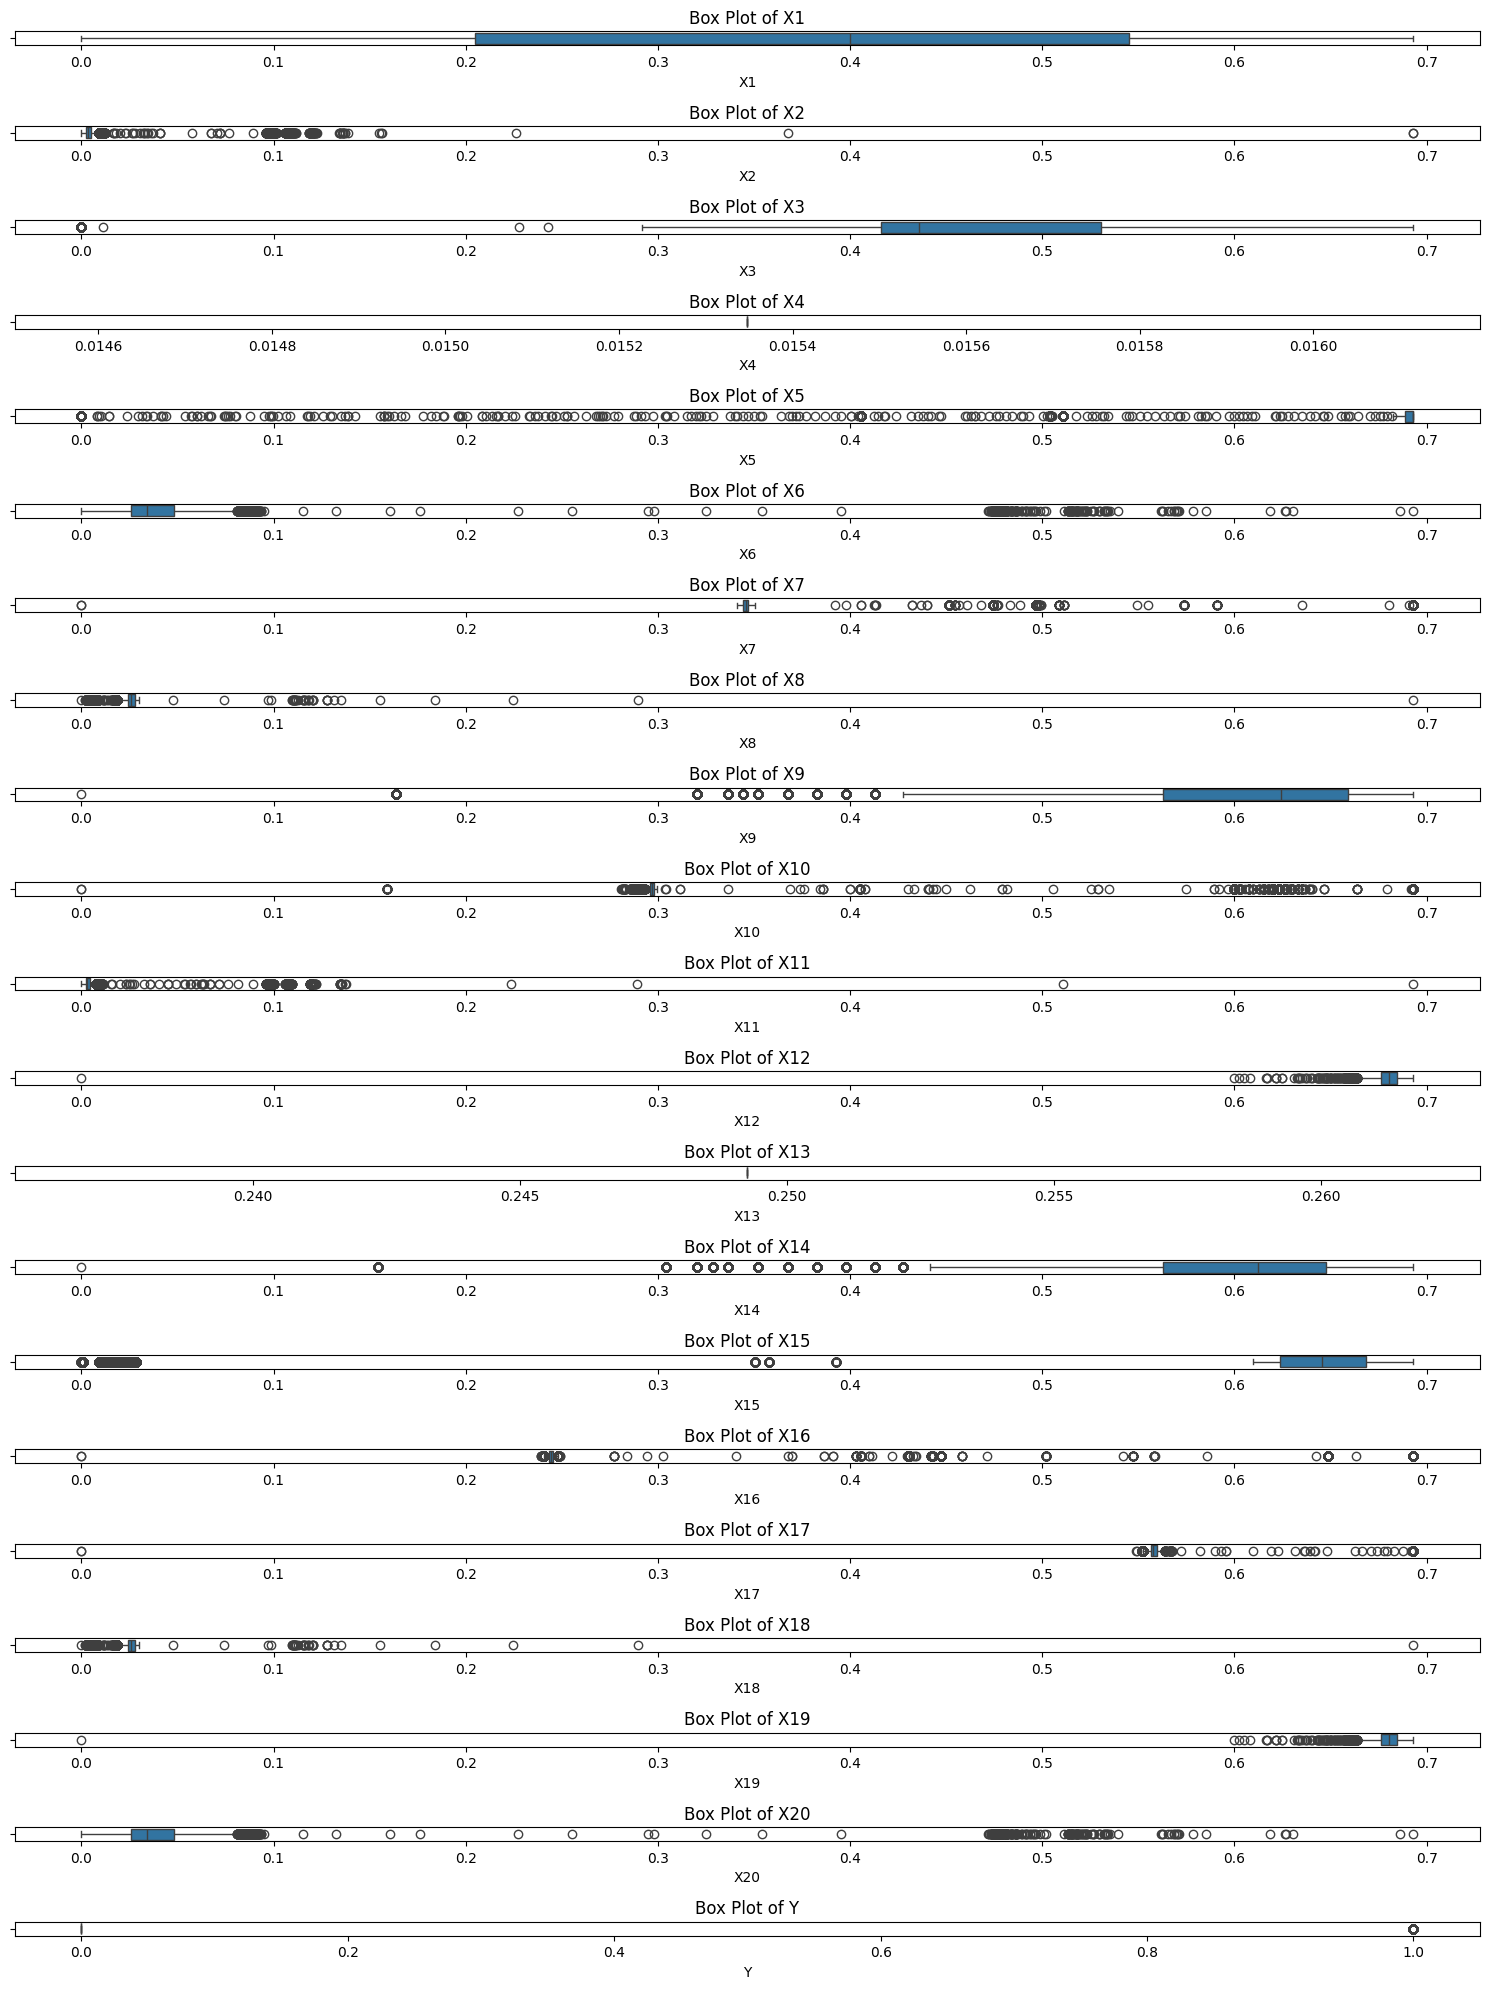

In [33]:
# 수치형 변수 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 상자수염 그래프 그리기
plt.figure(figsize=(15, 20))  # 그래프 전체 크기 설정
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # 각 변수를 위한 서브플롯 설정
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # 레이아웃 조정
plt.show()


# EDA

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527000 entries, 0 to 526999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      527000 non-null  float64
 1   X2      527000 non-null  float64
 2   X3      527000 non-null  float64
 3   X5      527000 non-null  float64
 4   X6      527000 non-null  float64
 5   X7      527000 non-null  float64
 6   X8      527000 non-null  float64
 7   X9      527000 non-null  float64
 8   X10     527000 non-null  float64
 9   X11     527000 non-null  float64
 10  X12     527000 non-null  float64
 11  X14     527000 non-null  float64
 12  X15     527000 non-null  float64
 13  X16     527000 non-null  float64
 14  X17     527000 non-null  float64
 15  X18     527000 non-null  float64
 16  X19     527000 non-null  float64
 17  X20     527000 non-null  float64
 18  Y       527000 non-null  int64  
dtypes: float64(18), int64(1)
memory usage: 76.4 MB
None


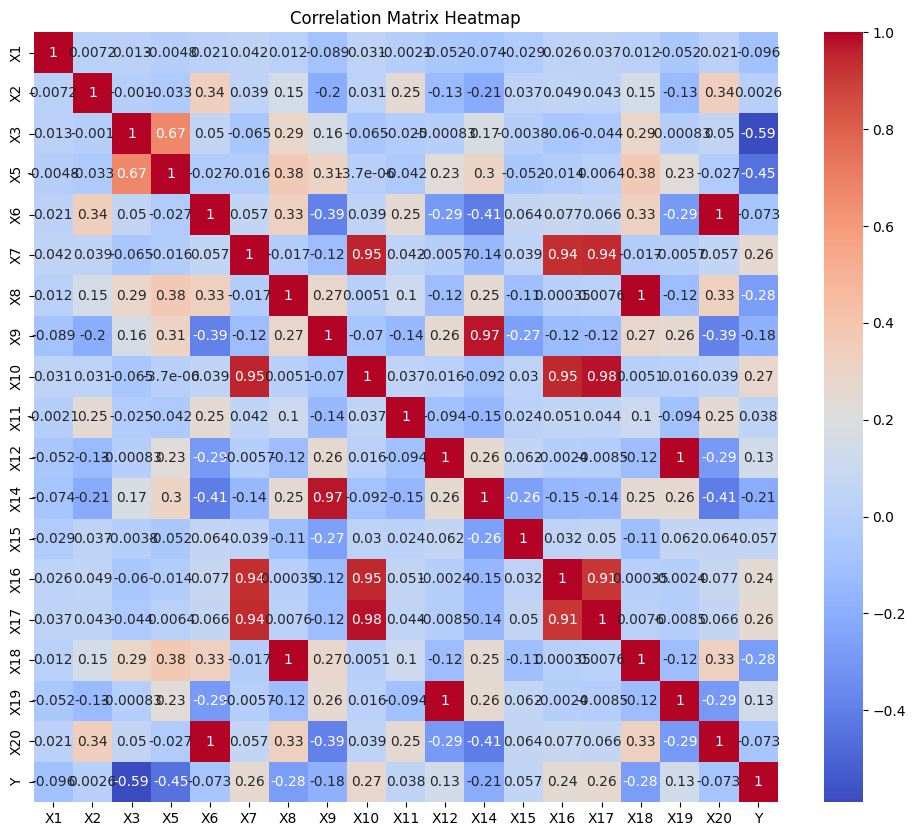

In [35]:
# 데이터 확인
print("DataFrame Info:")
print(df.info())

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [36]:
# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계가 1인 변수 쌍 찾기
high_correlation_pairs = []
for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if column != index and correlation_matrix.loc[index, column] == 1:
            high_correlation_pairs.append((column, index))

# 상관관계가 1인 변수 쌍 출력
print("High correlation (1.0) pairs:", high_correlation_pairs)

# 완전히 같은 데이터인지 확인
identical_columns = []
for col1, col2 in high_correlation_pairs:
    if df[col1].equals(df[col2]):
        identical_columns.append((col1, col2))

print("Identical columns:", identical_columns)


High correlation (1.0) pairs: [('X6', 'X20'), ('X8', 'X18'), ('X12', 'X19'), ('X18', 'X8'), ('X19', 'X12'), ('X20', 'X6')]
Identical columns: [('X6', 'X20'), ('X8', 'X18'), ('X12', 'X19'), ('X18', 'X8'), ('X19', 'X12'), ('X20', 'X6')]


In [37]:
df = df.drop(columns=['X18', 'X19','X20'])

# 시각화

###X1

<Axes: xlabel='X1', ylabel='Count'>

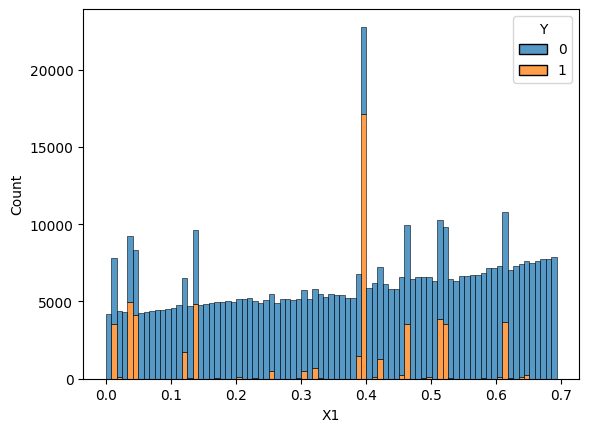

In [38]:
sns.histplot(data=df, x='X1', hue='Y', multiple='stack')

###X2>=0.03 높은확률로 불량(726개,소량)

<Axes: xlabel='X2', ylabel='Count'>

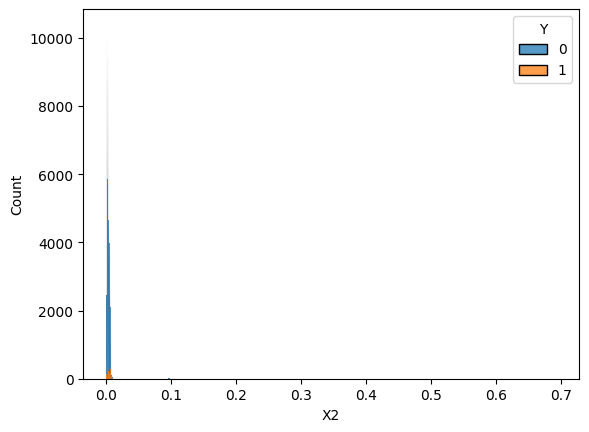

In [39]:
sns.histplot(data=df, x='X2', hue='Y', multiple='stack')

In [40]:
df_X2=df[df['X2']>=0.03]
df_X2['Y'].value_counts()

0    726
1      4
Name: Y, dtype: int64

##X3 특정값 이하면 Y=1

In [41]:
df['X3'].value_counts()

0.000000    17360
0.415162     1763
0.415907     1750
0.417313     1745
0.418056     1743
            ...  
0.478669        1
0.458779        1
0.454123        1
0.478667        1
0.412369        1
Name: X3, Length: 5117, dtype: int64

In [42]:
df_X3_0=df[df['X3']==0]
df_X3_0

X1        X2   X3   X5        X6        X7        X8        X9  \
470002  0.399744  0.004891  0.0  0.0  0.039912  0.346830  0.017663  0.483797   
470007  0.399744  0.004784  0.0  0.0  0.038975  0.346830  0.017663  0.483797   
470010  0.399744  0.004846  0.0  0.0  0.038750  0.346830  0.017663  0.483797   
470011  0.399744  0.004247  0.0  0.0  0.034776  0.346218  0.017663  0.510826   
470016  0.399744  0.004128  0.0  0.0  0.034313  0.346065  0.017663  0.524071   
...          ...       ...  ...  ...       ...       ...       ...       ...   
526960  0.399744  0.004588  0.0  0.0  0.037430  0.346524  0.017663  0.497403   
526965  0.399744  0.003965  0.0  0.0  0.034380  0.346065  0.017663  0.524071   
526974  0.399744  0.004104  0.0  0.0  0.034670  0.346218  0.017663  0.510826   
526985  0.399744  0.004719  0.0  0.0  0.038646  0.346830  0.017663  0.483797   
526991  0.399744  0.005000  0.0  0.0  0.039953  0.346830  0.017663  0.483797   

             X10       X11       X12       X14      X15       X16       X17  Y  
470002  0.295929  0.004561  0.677053  0.483797  0.61333  0.244222  0.556104  1  
470007  0.295876  0.004533  0.679842  0.483797  0.61333  0.244222  0.556228  1  
470010  0.295929  0.004489  0.676199  0.483797  0.61333  0.244222  0.556228  1  
470011  0.295929  0.003918  0.679037  0.510826  0.61333  0.243884  0.556721  1  
470016  0.295929  0.003924  0.683841  0.537143  0.61333  0.243546  0.559185  1  
...          ...       ...       ...       ...      ...       ...       ... ..  
526960  0.295897  0.004217  0.673526  0.497403  0.61333  0.243940  0.556474  1  
526965  0.295929  0.003901  0.684054  0.537143  0.61333  0.243546  0.558939  1  
526974  0.296249  0.004032  0.682658  0.510826  0.61333  0.243546  0.557215  1  
526985  0.295929  0.004484  0.676234  0.483797  0.61333  0.244222  0.556228  1  
526991  0.295769  0.004600  0.679031  0.483797  0.61333  0.244222  0.556228  1  

[17360 rows x 16 columns]

In [43]:
df_X3_0['Y'].unique()

array([1], dtype=int64)

In [44]:
df_X3_0['Y'].value_counts()

1    17360
Name: Y, dtype: int64

In [45]:
df_X3_0_40=df[df['X3']<=0.4]
df_X3_0_40

X1        X2        X3        X5        X6        X7        X8  \
470000  0.141556  0.003740  0.397024  0.693090  0.031981  0.344381  0.024707   
470001  0.049564  0.003451  0.398373  0.693147  0.029711  0.343154  0.024778   
470002  0.399744  0.004891  0.000000  0.000000  0.039912  0.346830  0.017663   
470003  0.512265  0.001807  0.395167  0.688810  0.018584  0.341926  0.024307   
470004  0.525100  0.003425  0.394998  0.688810  0.030170  0.343461  0.025165   
...          ...       ...       ...       ...       ...       ...       ...   
526992  0.049564  0.003339  0.395505  0.693147  0.029886  0.342847  0.024778   
526994  0.512265  0.002157  0.394237  0.688810  0.019866  0.341926  0.024307   
526996  0.512265  0.002282  0.395505  0.688810  0.021745  0.342540  0.024307   
526998  0.512265  0.002267  0.394744  0.688810  0.020826  0.341926  0.024307   
526999  0.118755  0.003229  0.398373  0.510595  0.028349  0.343154  0.025920   

              X9       X10       X11       X12       X14       X15       X16  \
470000  0.575364  0.297847  0.003547  0.688108  0.575364  0.644881  0.242193   
470001  0.647685  0.296249  0.003338  0.684886  0.635989  0.637721  0.241516   
470002  0.483797  0.295929  0.004561  0.677053  0.483797  0.613330  0.244222   
470003  0.681974  0.296889  0.002151  0.689484  0.681974  0.658006  0.240161   
470004  0.635989  0.298007  0.003329  0.688367  0.612178  0.652919  0.241855   
...          ...       ...       ...       ...       ...       ...       ...   
526992  0.647685  0.296249  0.003255  0.685914  0.635989  0.637721  0.241177   
526994  0.693147  0.296889  0.002209  0.688463  0.681974  0.658006  0.240161   
526996  0.681974  0.297209  0.002300  0.687581  0.670674  0.658006  0.240500   
526998  0.693147  0.296889  0.002346  0.689263  0.681974  0.658006  0.240500   
526999  0.647685  0.297209  0.003069  0.683904  0.635989  0.627492  0.241516   

             X17  Y  
470000  0.557461  1  
470001  0.555116  1  
470002  0.556104  1  
470003  0.556721  1  
470004  0.555981  1  
...          ... ..  
526992  0.555280  1  
526994  0.556968  1  
526996  0.555487  1  
526998  0.557215  1  
526999  0.559431  1  

[48493 rows x 16 columns]

In [46]:
df_X3_0_40=df[df['X3']==0]
df_X3_0_40['Y'].value_counts()

1    17360
Name: Y, dtype: int64

In [47]:
df_X3_0_40=df[df['X3']<=0.4]
df_X3_0_40['Y'].value_counts()

1    48493
Name: Y, dtype: int64

In [48]:
df_X3_0_43=df[df['X3']<=0.405]
df_X3_0_43['Y'].value_counts()

1    53268
Name: Y, dtype: int64

In [49]:
df_X3_0_43=df[df['X3']<=0.4053]
df_X3_0_43['Y'].value_counts()

1    53352
Name: Y, dtype: int64

In [50]:
df_X3_0_43=df[df['X3']<=0.40533]
df_X3_0_43['Y'].value_counts()

1    53352
Name: Y, dtype: int64

In [51]:
df_X3_0_43=df[df['X3']<=0.405339]
df_X3_0_43['Y'].value_counts()

1    53352
Name: Y, dtype: int64

###X3<=0.405339 다 불량(53,352개)

In [52]:
df_X3_0_43=df[df['X3']<=0.40534]
df_X3_0_43['Y'].value_counts()

1    53418
0        1
Name: Y, dtype: int64

##X5

<Axes: xlabel='X5', ylabel='Count'>

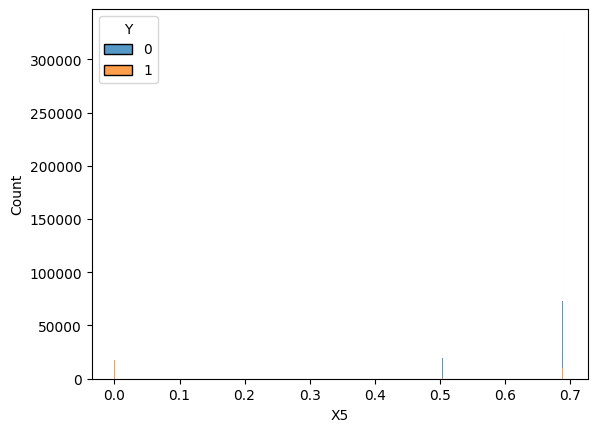

In [53]:
sns.histplot(data=df, x='X5', hue='Y', multiple='stack')

In [54]:
df_X5=df[df['X5']==0]
df_X5['Y'].value_counts()

1    17358
Name: Y, dtype: int64

In [55]:
df_X5=df[df['X5']<=0.1]
df_X5['Y'].value_counts()

1    17396
Name: Y, dtype: int64

###X5<=0.4 다 불량(17,496개)

In [56]:
df_X5=df[df['X5']<=0.4]
df_X5['Y'].value_counts()

1    17496
Name: Y, dtype: int64

##X6>=0.1 높은확률로 불량(225개,소량)

<Axes: xlabel='X6', ylabel='Count'>

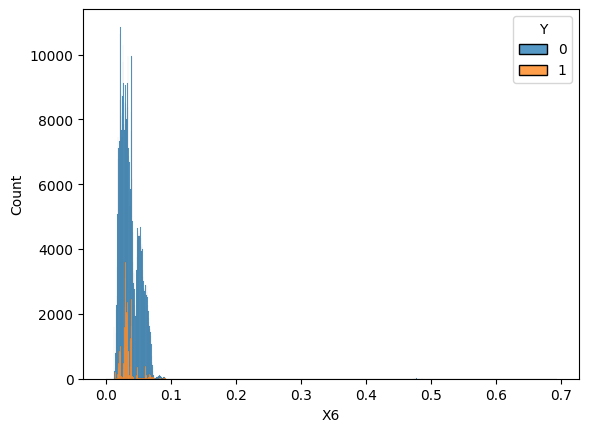

In [57]:
sns.histplot(data=df, x='X6', hue='Y', multiple='stack')

In [58]:
df_X2=df[df['X6']>=0.1]
df_X2['Y'].value_counts()

0    225
1      1
Name: Y, dtype: int64

##X7

<Axes: xlabel='X7', ylabel='Count'>

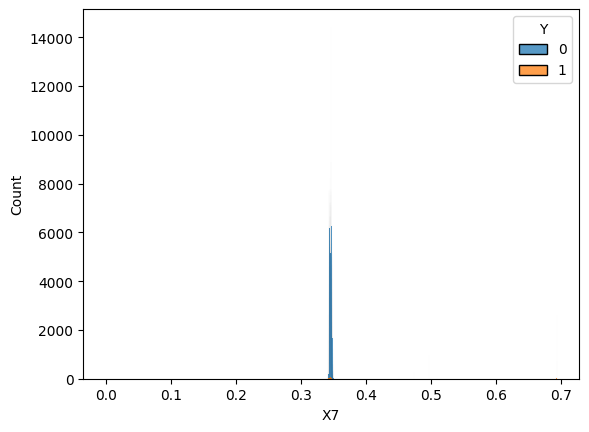

In [59]:
sns.histplot(data=df, x='X7', hue='Y', multiple='stack')

##X8

<Axes: xlabel='X8', ylabel='Count'>

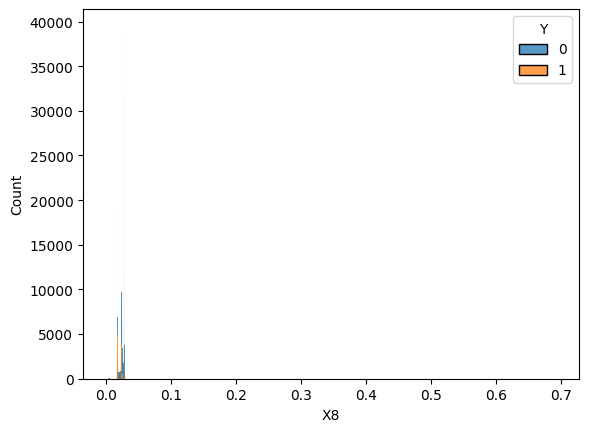

In [60]:
sns.histplot(data=df, x='X8', hue='Y', multiple='stack')

##X9

<Axes: xlabel='X9', ylabel='Count'>

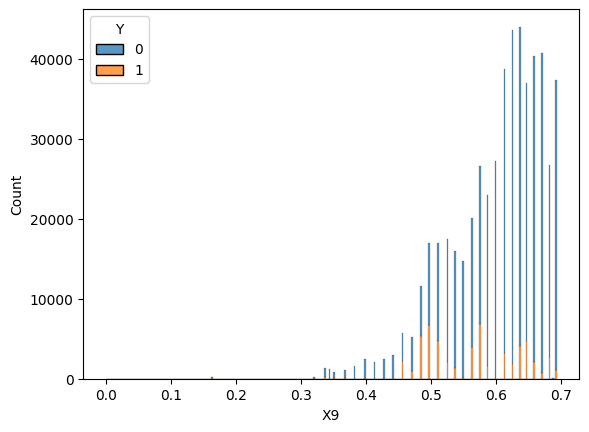

In [61]:
sns.histplot(data=df, x='X9', hue='Y', multiple='stack')

##X10<=0.29면 다 불량(126개,소량임)

<Axes: xlabel='X10', ylabel='Count'>

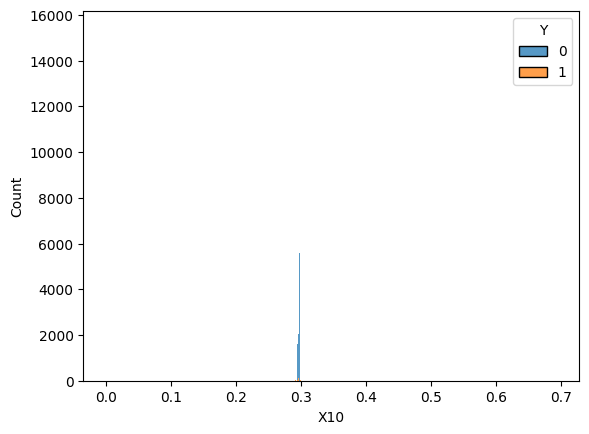

In [62]:
sns.histplot(data=df, x='X10', hue='Y', multiple='stack')

In [63]:
df_X10=df[df['X10']<=0.29]
df_X10['Y'].value_counts()

1    126
Name: Y, dtype: int64

##X11

<Axes: xlabel='X11', ylabel='Count'>

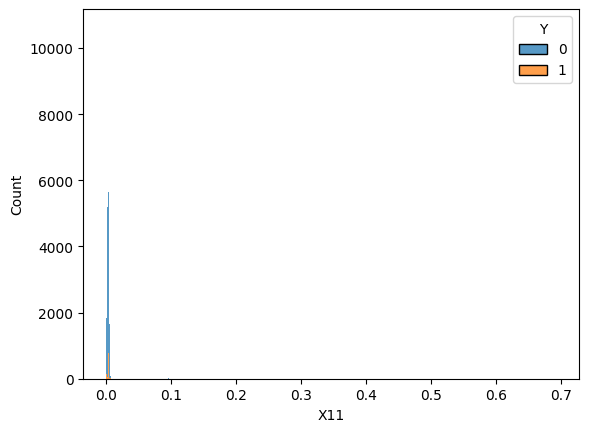

In [64]:
sns.histplot(data=df, x='X11', hue='Y', multiple='stack')

##X12

<Axes: xlabel='X12', ylabel='Count'>

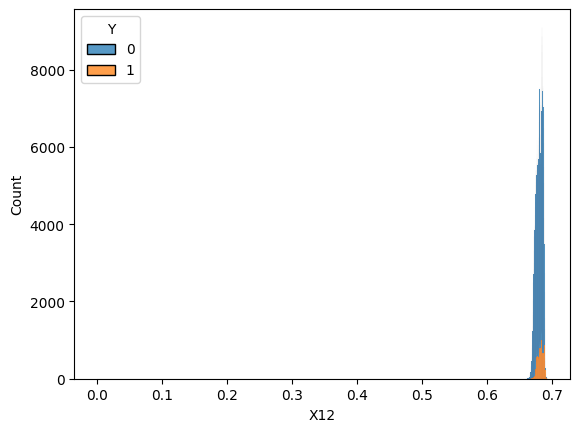

In [65]:
sns.histplot(data=df, x='X12', hue='Y', multiple='stack')

##X14

<Axes: xlabel='X14', ylabel='Count'>

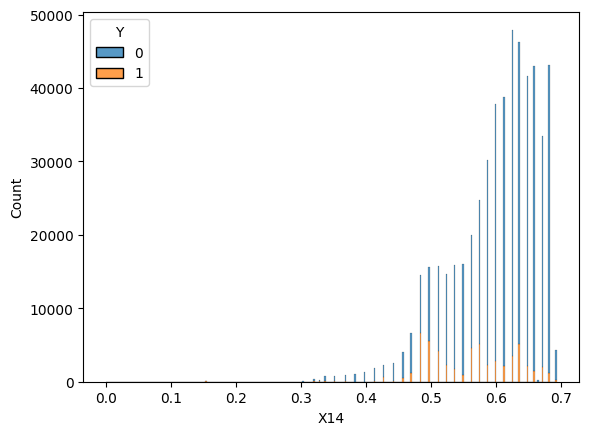

In [67]:
sns.histplot(data=df, x='X14', hue='Y', multiple='stack')

##X15

<Axes: xlabel='X15', ylabel='Count'>

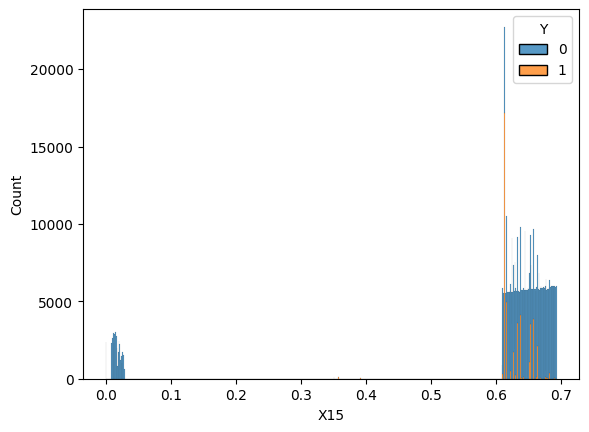

In [68]:
sns.histplot(data=df, x='X15', hue='Y', multiple='stack')

##X16<=0.2, X16>=0.3 불량 (4,912개)

<Axes: xlabel='X16', ylabel='Count'>

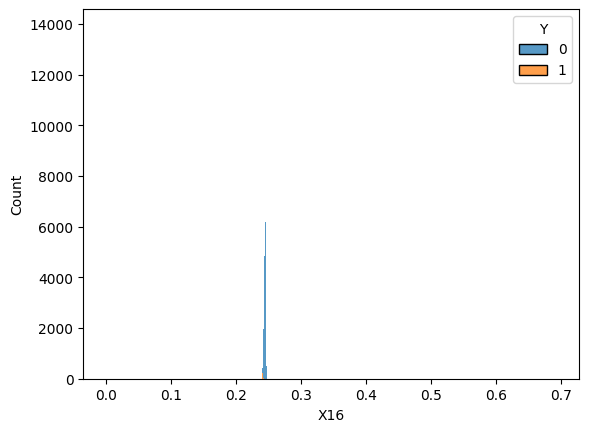

In [69]:
sns.histplot(data=df, x='X16', hue='Y', multiple='stack')

In [70]:
df_X16=df[df['X16']<=0.2]
df_X16['Y'].value_counts()

1    2
Name: Y, dtype: int64

In [71]:
df_X16=df[df['X16']>=0.3]
df_X16['Y'].value_counts()

1    4910
Name: Y, dtype: int64

##X17<=0.5, X17>=0.6 (4,872개)

<Axes: xlabel='X17', ylabel='Count'>

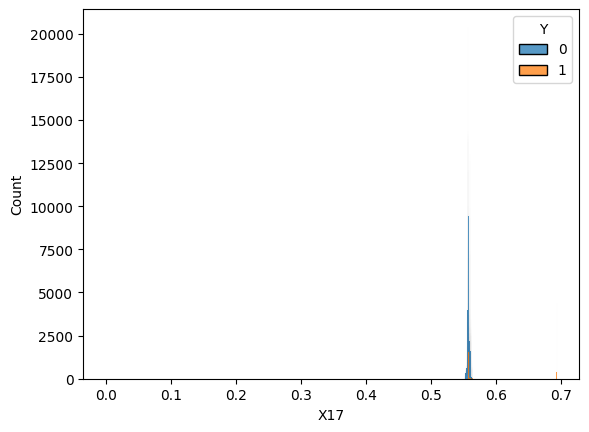

In [72]:
sns.histplot(data=df, x='X17', hue='Y', multiple='stack')

In [73]:
df_X16=df[df['X17']<=0.5]
df_X16['Y'].value_counts()

1    2
Name: Y, dtype: int64

In [74]:
df_X16=df[df['X17']>=0.6]
df_X16['Y'].value_counts()

1    4870
Name: Y, dtype: int64

##X4, X13 다 같은 값

In [77]:
df['X4'].value_counts()

0.015348    527000
Name: X4, dtype: int64

In [78]:
df['X13'].value_counts()

0.249262    527000
Name: X13, dtype: int64

In [79]:
print(df['Y'].value_counts())
print(df['Y'].value_counts(normalize = True))

0    470000
1     57000
Name: Y, dtype: int64
0    0.891841
1    0.108159
Name: Y, dtype: float64


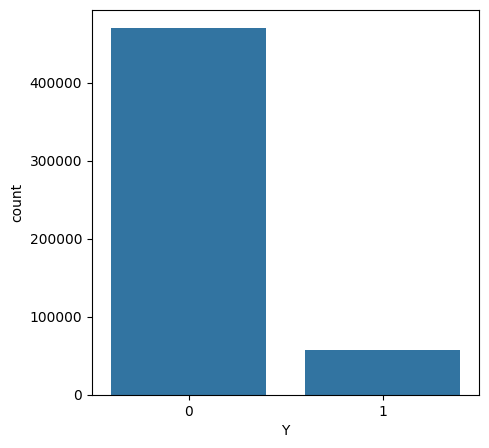

In [80]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Y', data = df, order = df['Y'].value_counts().index)
plt.show()

<Axes: >

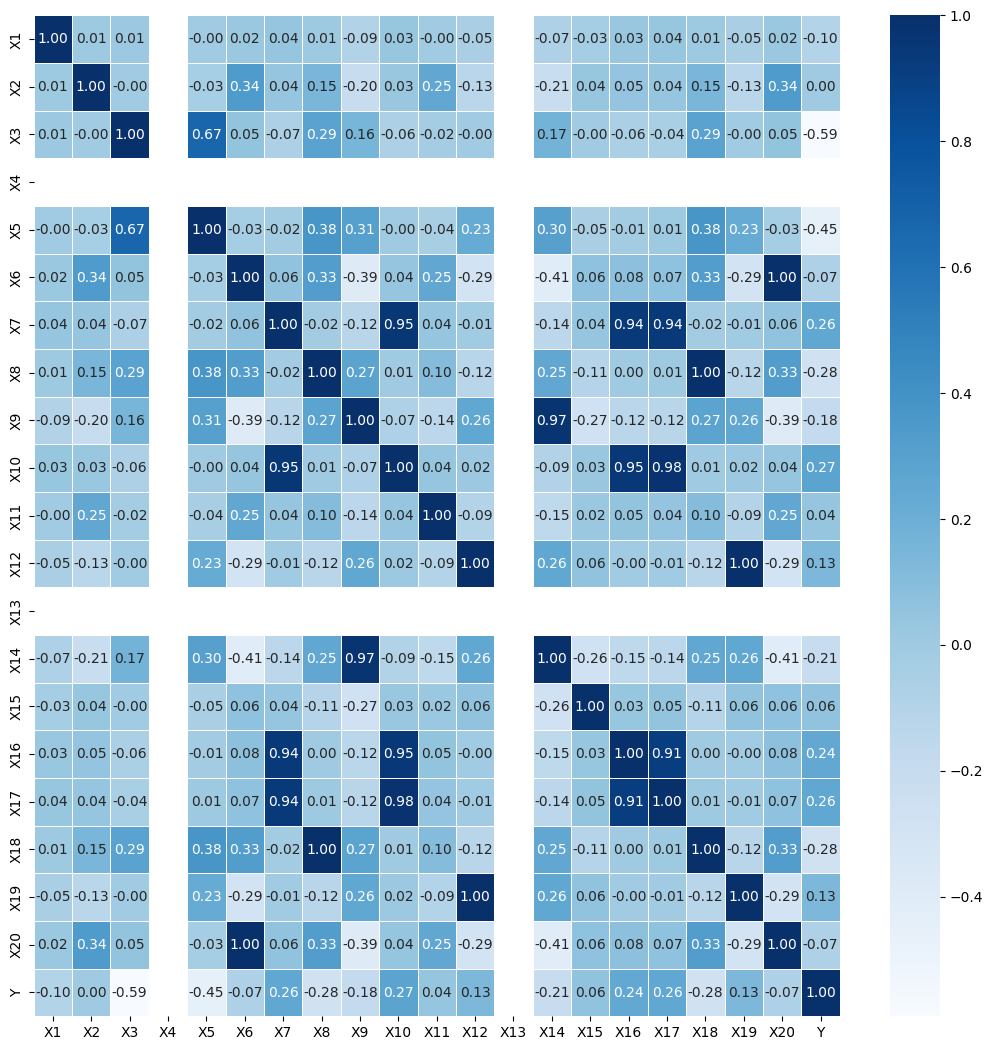

In [81]:
plt.figure(figsize=(13,13))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [82]:
df = df.drop(columns=['X4', 'X13'])

# 변수 선택

In [83]:
## T-test 검정

t_test = []

for idx, col in enumerate(df.columns):
    t = scipy.stats.ttest_ind(df[df['Y']==0][col],
                              df[df['Y']==1][col])
    t_test.append([col, t[0], t[1]])

t_test_df = pd.DataFrame(t_test, columns=['col', 't', 'p-value'])

## P-value가 0.05보다 작은 변수만 추출
t_test_df = t_test_df[t_test_df['p-value']<0.05]
t_test_df

C:\Users\USER\AppData\Local\Temp\ipykernel_6056\1977372337.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t = scipy.stats.ttest_ind(df[df['Y']==0][col],


col           t        p-value
0    X1   70.308079   0.000000e+00
2    X3  530.696338   0.000000e+00
3    X5  363.079979   0.000000e+00
4    X6   52.977659   0.000000e+00
5    X7 -192.741835   0.000000e+00
6    X8  209.101969   0.000000e+00
7    X9  135.787155   0.000000e+00
8   X10 -207.520706   0.000000e+00
9   X11  -27.394397  4.179607e-165
10  X12  -97.017079   0.000000e+00
11  X14  153.808454   0.000000e+00
12  X15  -41.560309   0.000000e+00
13  X16 -181.438928   0.000000e+00
14  X17 -191.516989   0.000000e+00
15  X18  209.101969   0.000000e+00
16  X19  -97.017079   0.000000e+00
17  X20   52.977659   0.000000e+00
18    Y        -inf   0.000000e+00

In [84]:
df = df.drop(columns=['X2'])

# 이상치 제거

In [85]:
df.shape

(527000, 18)

In [89]:
# 상위 및 하위 10%를 제거하는 함수 정의
def remove_top_bottom_10_percent(df, column):
    lower_bound = df[column].quantile(0.001)
    upper_bound = df[column].quantile(0.999)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 수치형 변수 선택 (목표 변수 Y 제외)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Y')

# 각 수치형 변수에 대해 상위 및 하위 10% 제거
for column in numeric_columns:
    df = remove_top_bottom_10_percent(df, column)

# 결과 출력
print("Shape of data after removing top and bottom 10% for each numeric column (excluding Y):", df.shape)


Shape of data after removing top and bottom 10% for each numeric column (excluding Y): (495439, 18)


In [88]:
df

X1        X3        X5        X6        X7        X8        X9  \
0       0.202296  0.411261  0.693147  0.036360  0.343512  0.028087  0.681974   
1       0.006836  0.597304  0.686838  0.067407  0.347869  0.028640  0.497403   
2       0.609621  0.466186  0.693090  0.018944  0.345032  0.024502  0.647685   
3       0.074007  0.535876  0.693147  0.031475  0.347502  0.025393  0.587787   
4       0.198356  0.416238  0.686838  0.061888  0.347441  0.028450  0.537143   
...          ...       ...       ...       ...       ...       ...       ...   
526992  0.049564  0.395505  0.693147  0.029886  0.342847  0.024778  0.647685   
526993  0.525100  0.400308  0.688810  0.030759  0.342847  0.024948  0.635989   
526995  0.612937  0.401400  0.693147  0.015237  0.346218  0.020338  0.470004   
526996  0.512265  0.395505  0.688810  0.021745  0.342540  0.024307  0.681974   
526999  0.118755  0.398373  0.510595  0.028349  0.343154  0.025920  0.647685   

             X10       X11       X12       X14       X15       X16       X17  \
0       0.295769  0.003053  0.682731  0.681974  0.016330  0.242926  0.557461   
1       0.297943  0.005816  0.680891  0.497403  0.670040  0.245876  0.561336   
2       0.298255  0.001475  0.685525  0.647685  0.648486  0.243602  0.559431   
3       0.296057  0.002462  0.677980  0.575364  0.632563  0.246078  0.556761   
4       0.298167  0.005314  0.673286  0.537143  0.671124  0.245505  0.561695   
...          ...       ...       ...       ...       ...       ...       ...   
526992  0.296249  0.003255  0.685914  0.635989  0.637721  0.241177  0.555280   
526993  0.298167  0.003405  0.686331  0.624154  0.652919  0.241177  0.557501   
526995  0.298167  0.001164  0.679403  0.483797  0.664080  0.243377  0.561398   
526996  0.297209  0.002300  0.687581  0.670674  0.658006  0.240500  0.555487   
526999  0.297209  0.003069  0.683904  0.635989  0.627492  0.241516  0.559431   

             X18       X19       X20  Y  
0       0.028087  0.682731  0.036360  0  
1       0.028640  0.680891  0.067407  0  
2       0.024502  0.685525  0.018944  0  
3       0.025393  0.677980  0.031475  0  
4       0.028450  0.673286  0.061888  0  
...          ...       ...       ... ..  
526992  0.024778  0.685914  0.029886  1  
526993  0.024948  0.686331  0.030759  1  
526995  0.020338  0.679403  0.015237  1  
526996  0.024307  0.687581  0.021745  1  
526999  0.025920  0.683904  0.028349  1  

[504897 rows x 18 columns]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import pandas as pd

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
y = df['Y']  # 종속 변수
X = df.drop(columns=['Y'])  # 독립 변수들

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

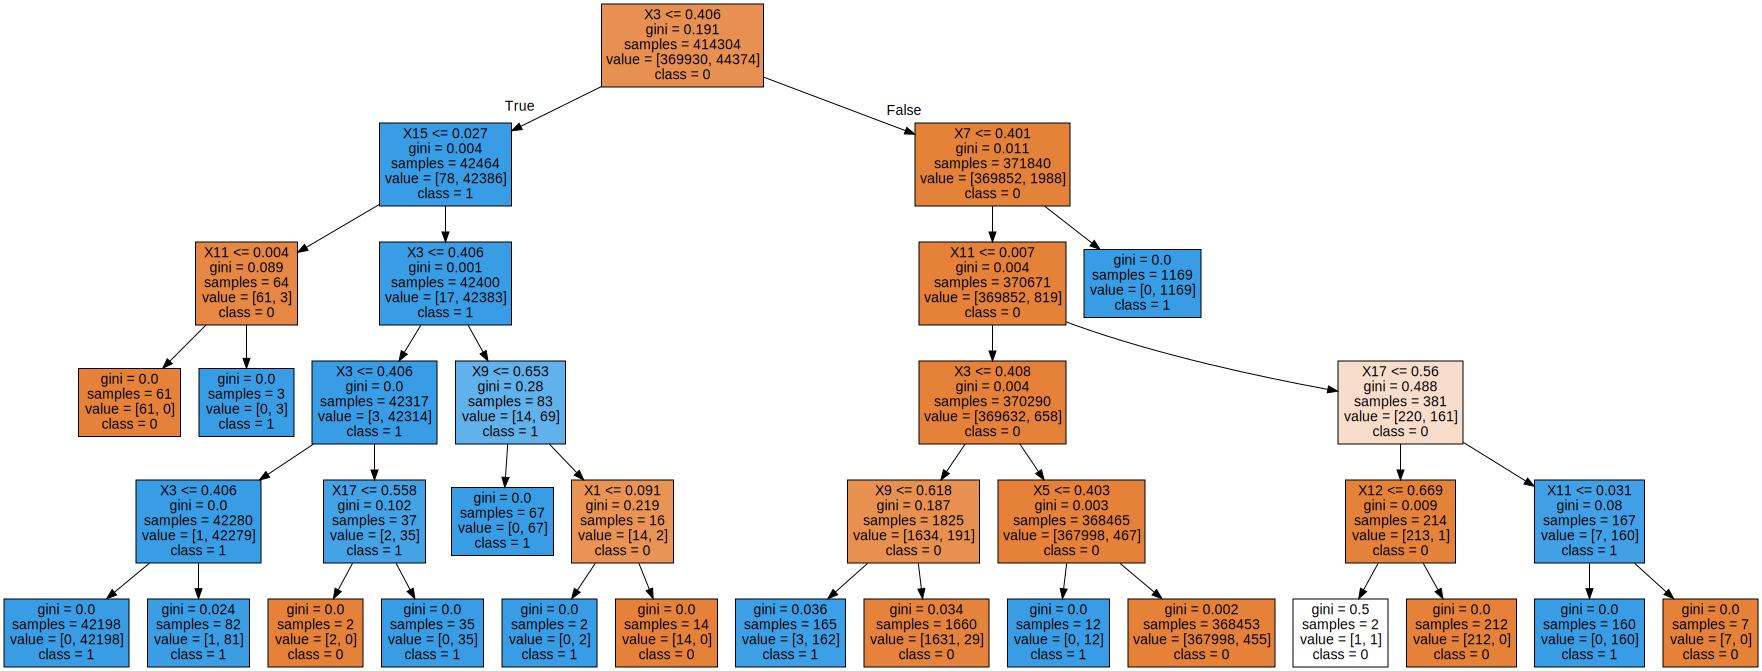

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42,
                                max_depth=5,
                                )

dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot",
                class_names=['0','1'],
                feature_names = X.columns,
                impurity=True,
                filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# AUTOBIZ

In [ ]:
pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: bokeh

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


    max_rows_analyzed is smaller than dataset shape 527000...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  18
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  2
    21 Predictors classified...
        2 variable(s) removed since they were ID or low-info

Number of All Scatter Plots = 171


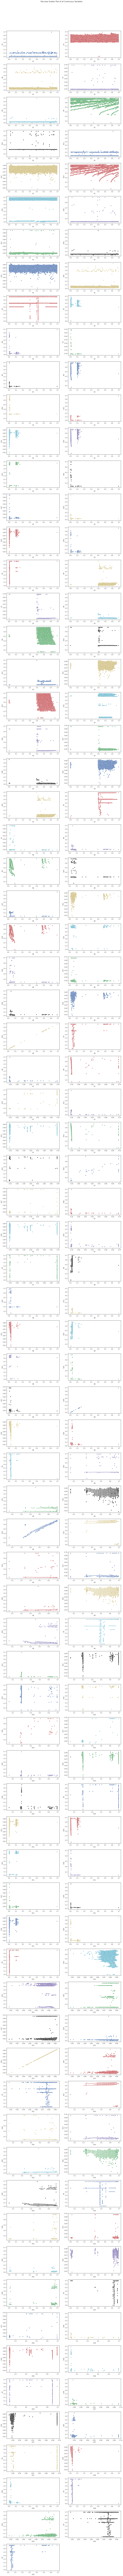

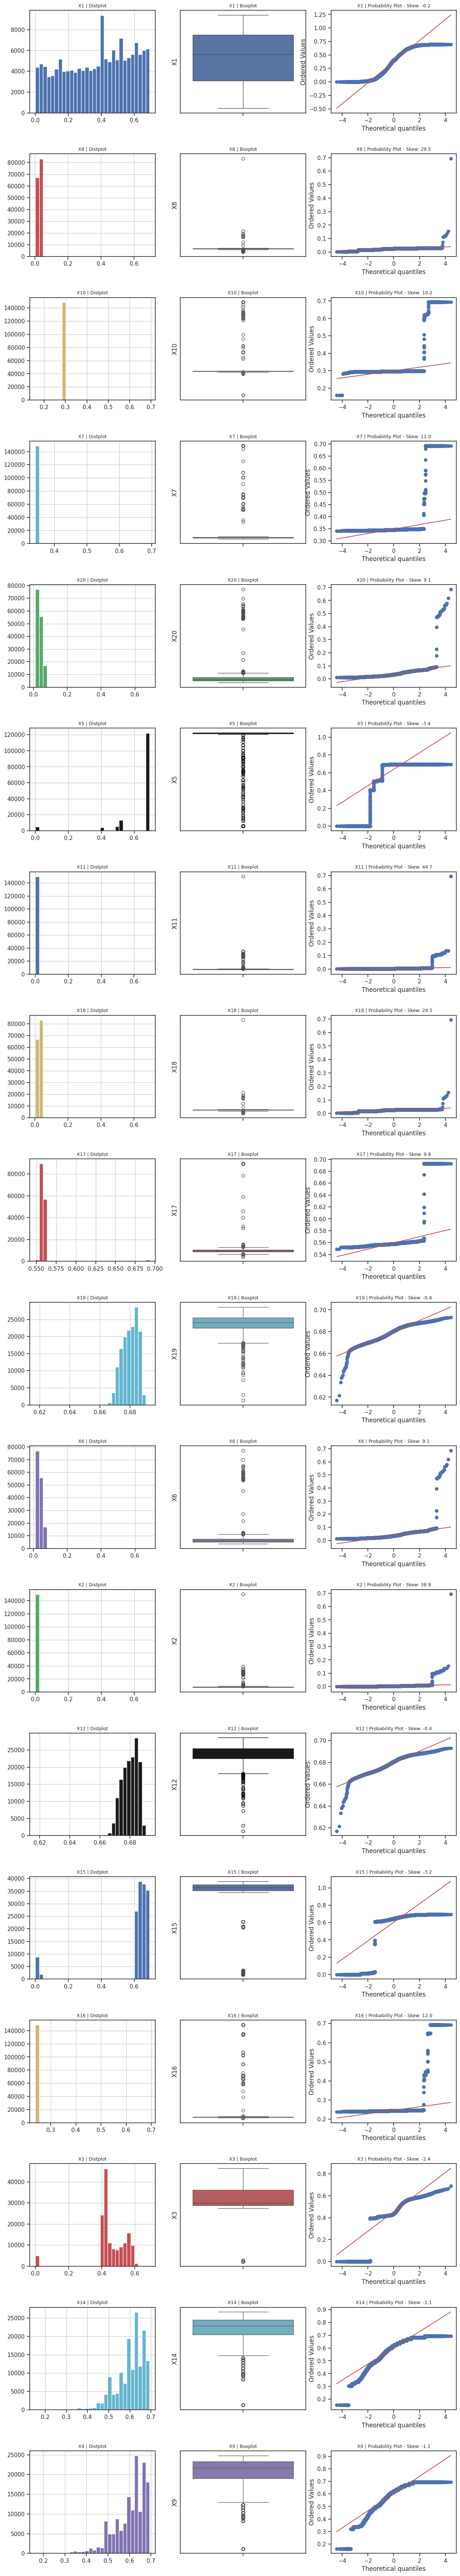

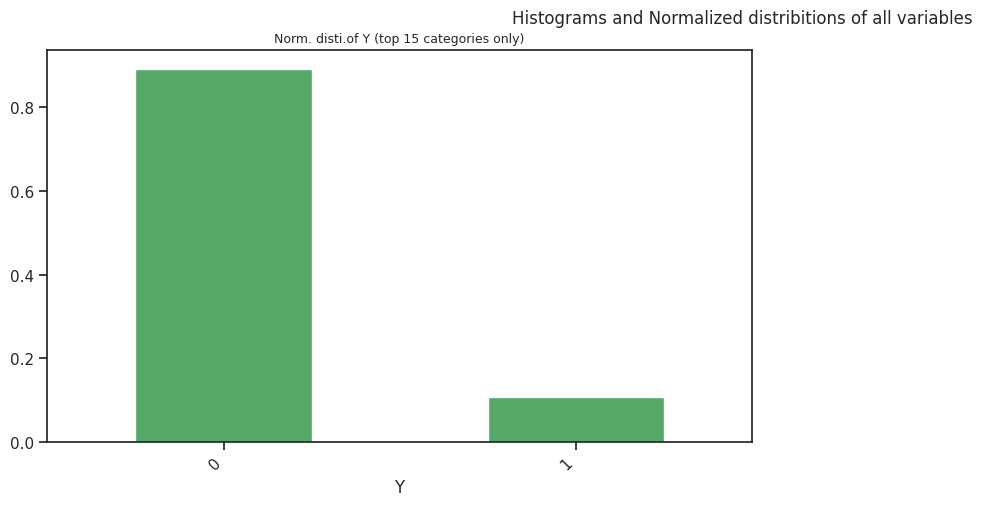

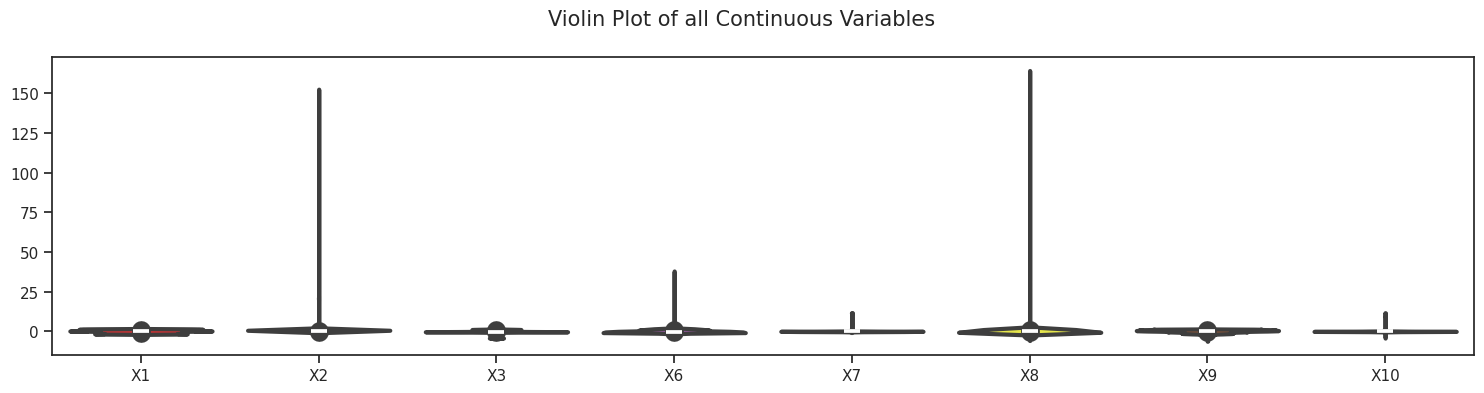

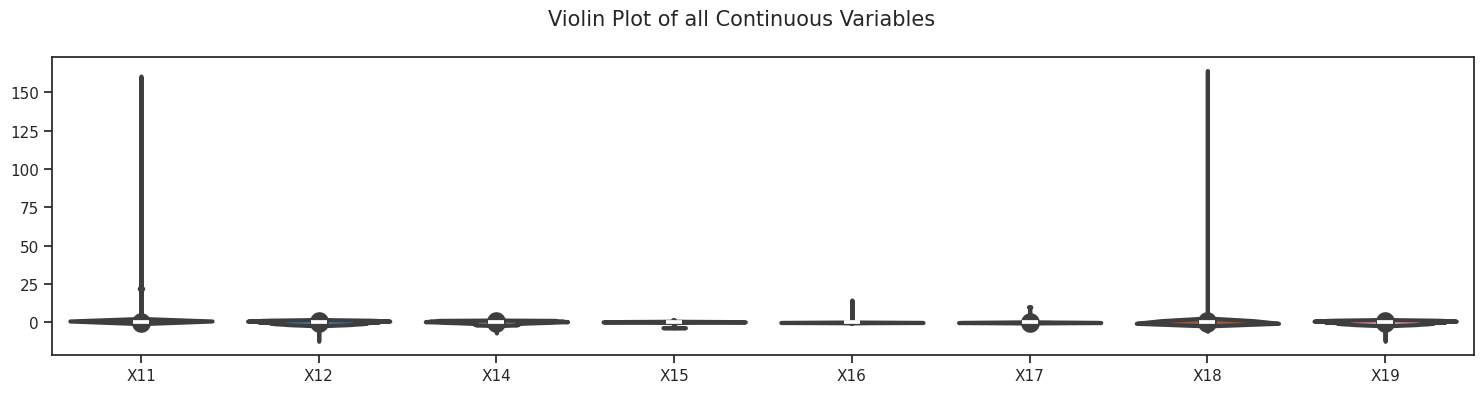

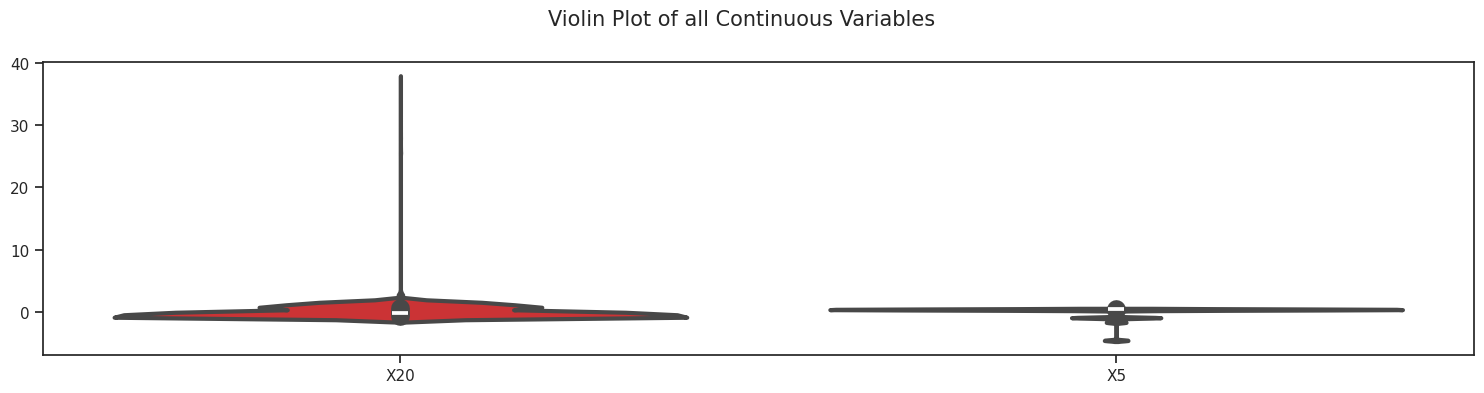

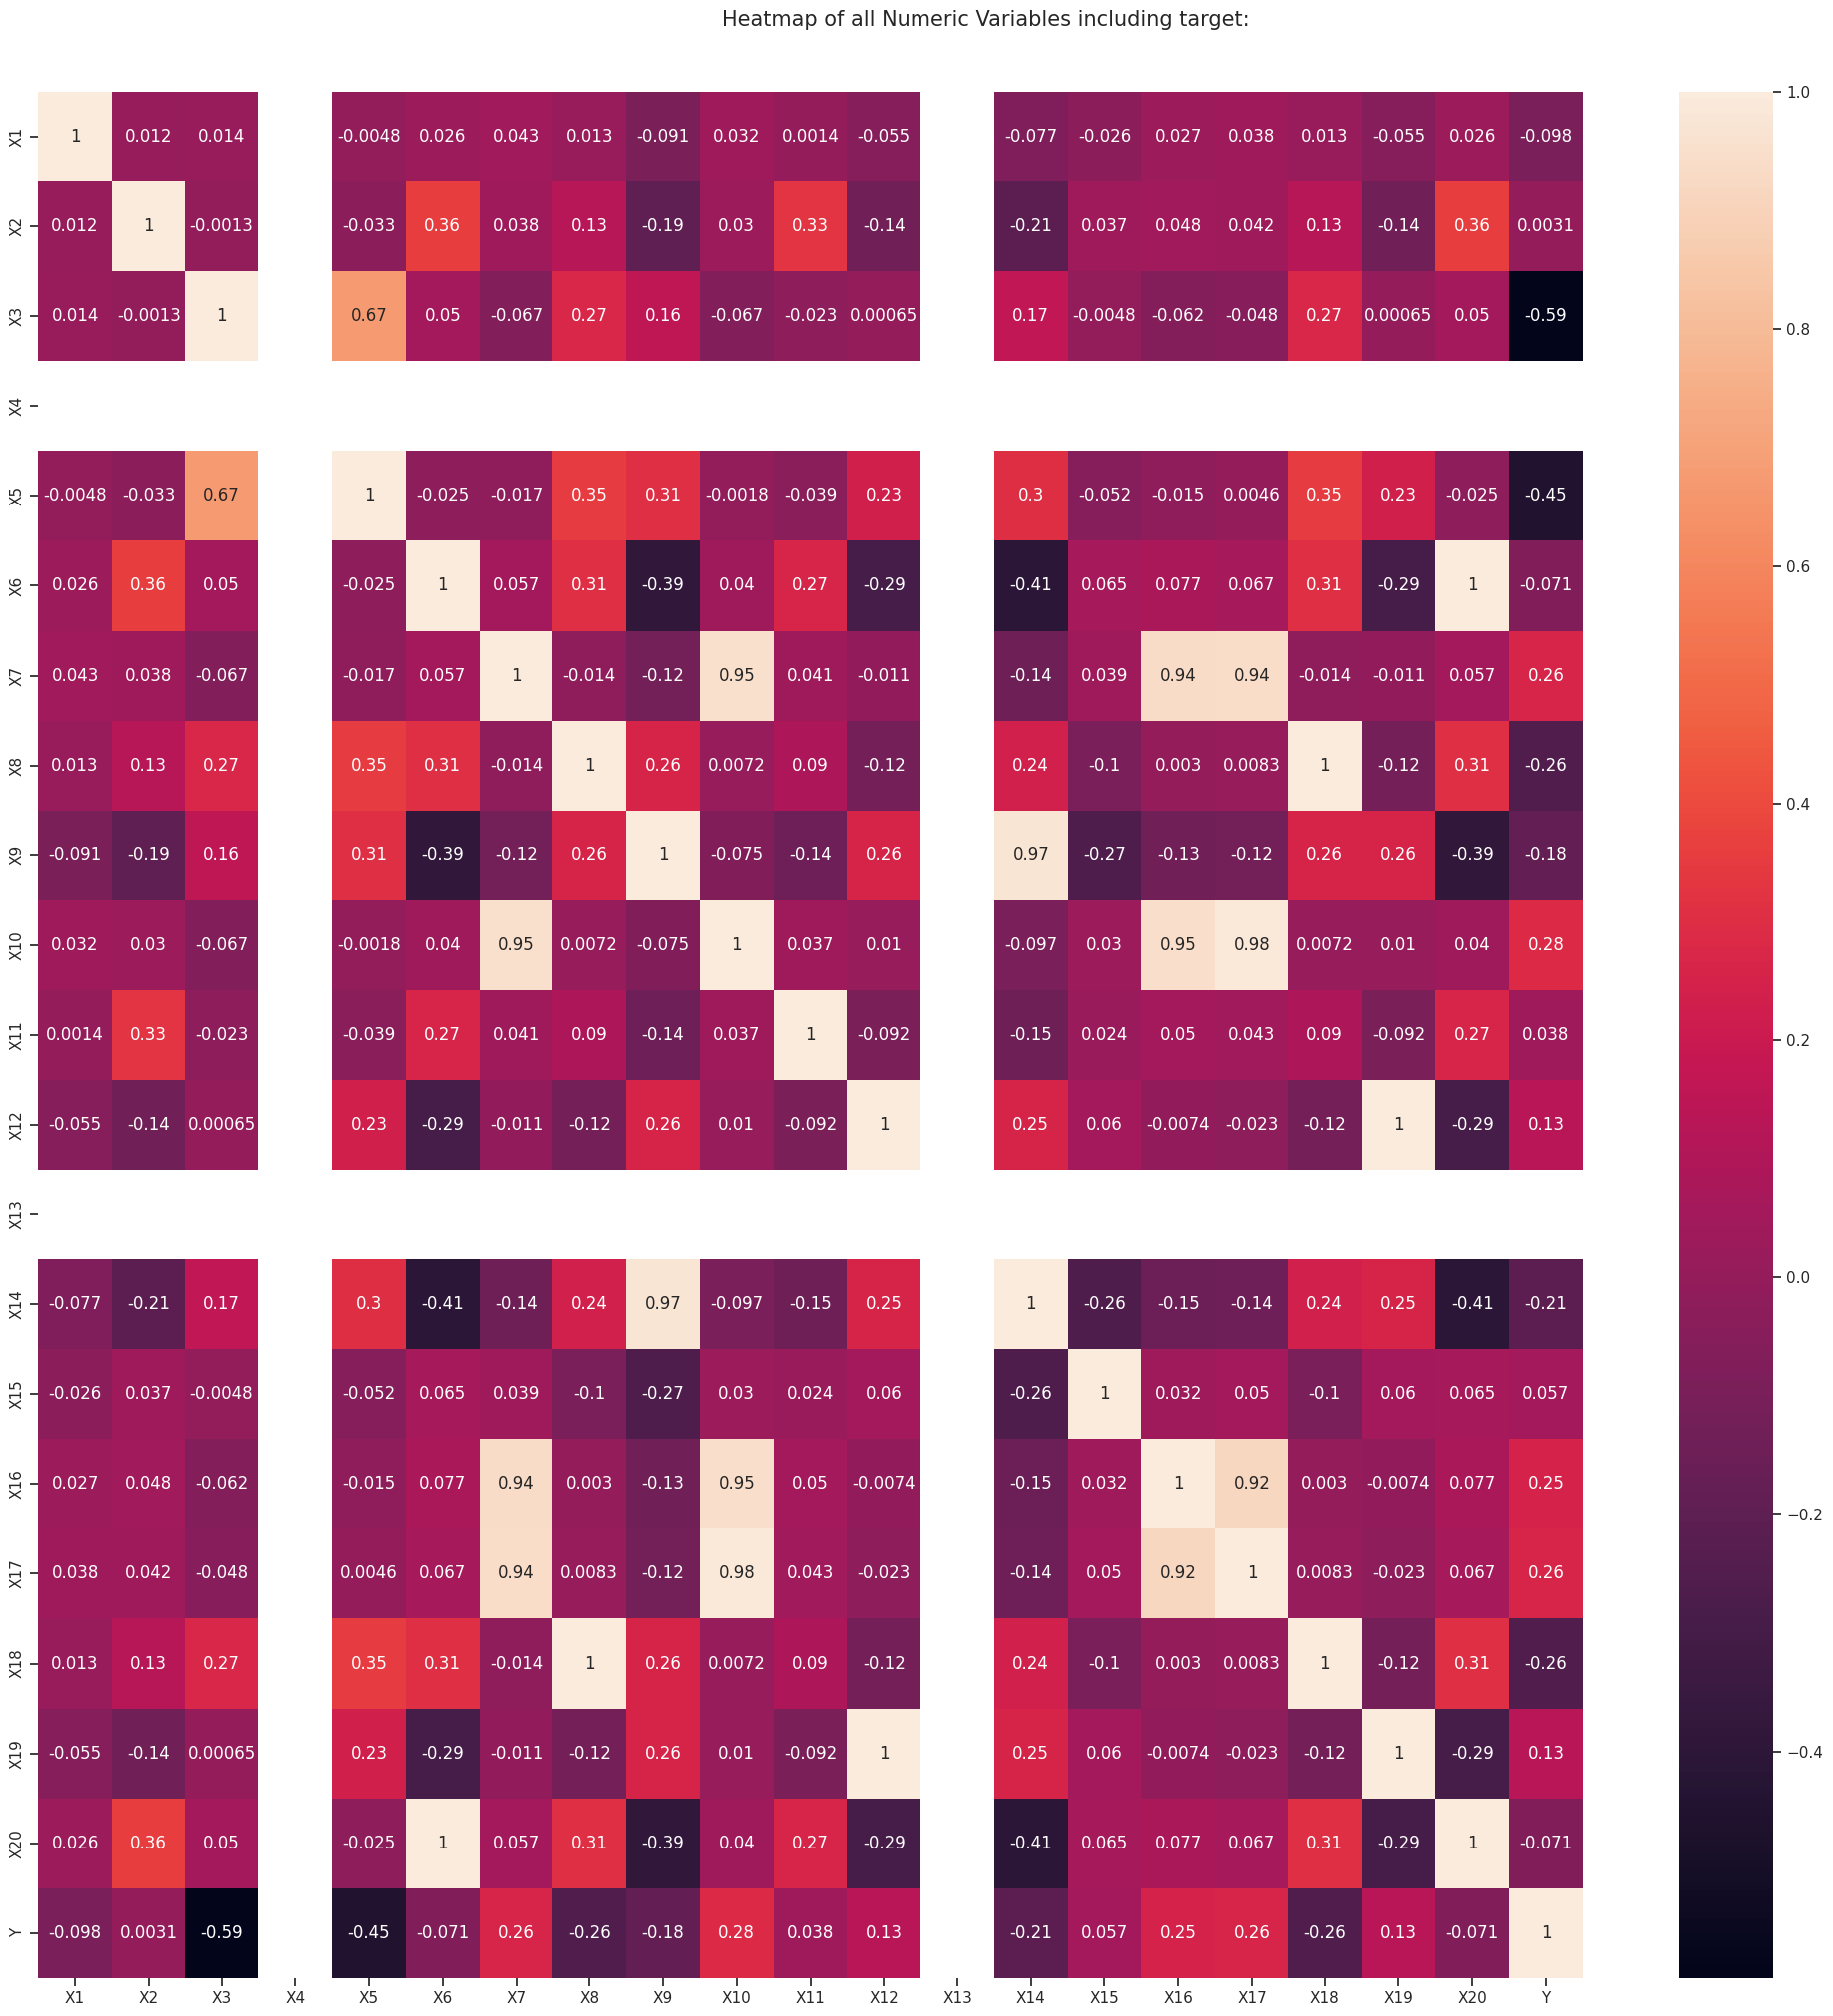

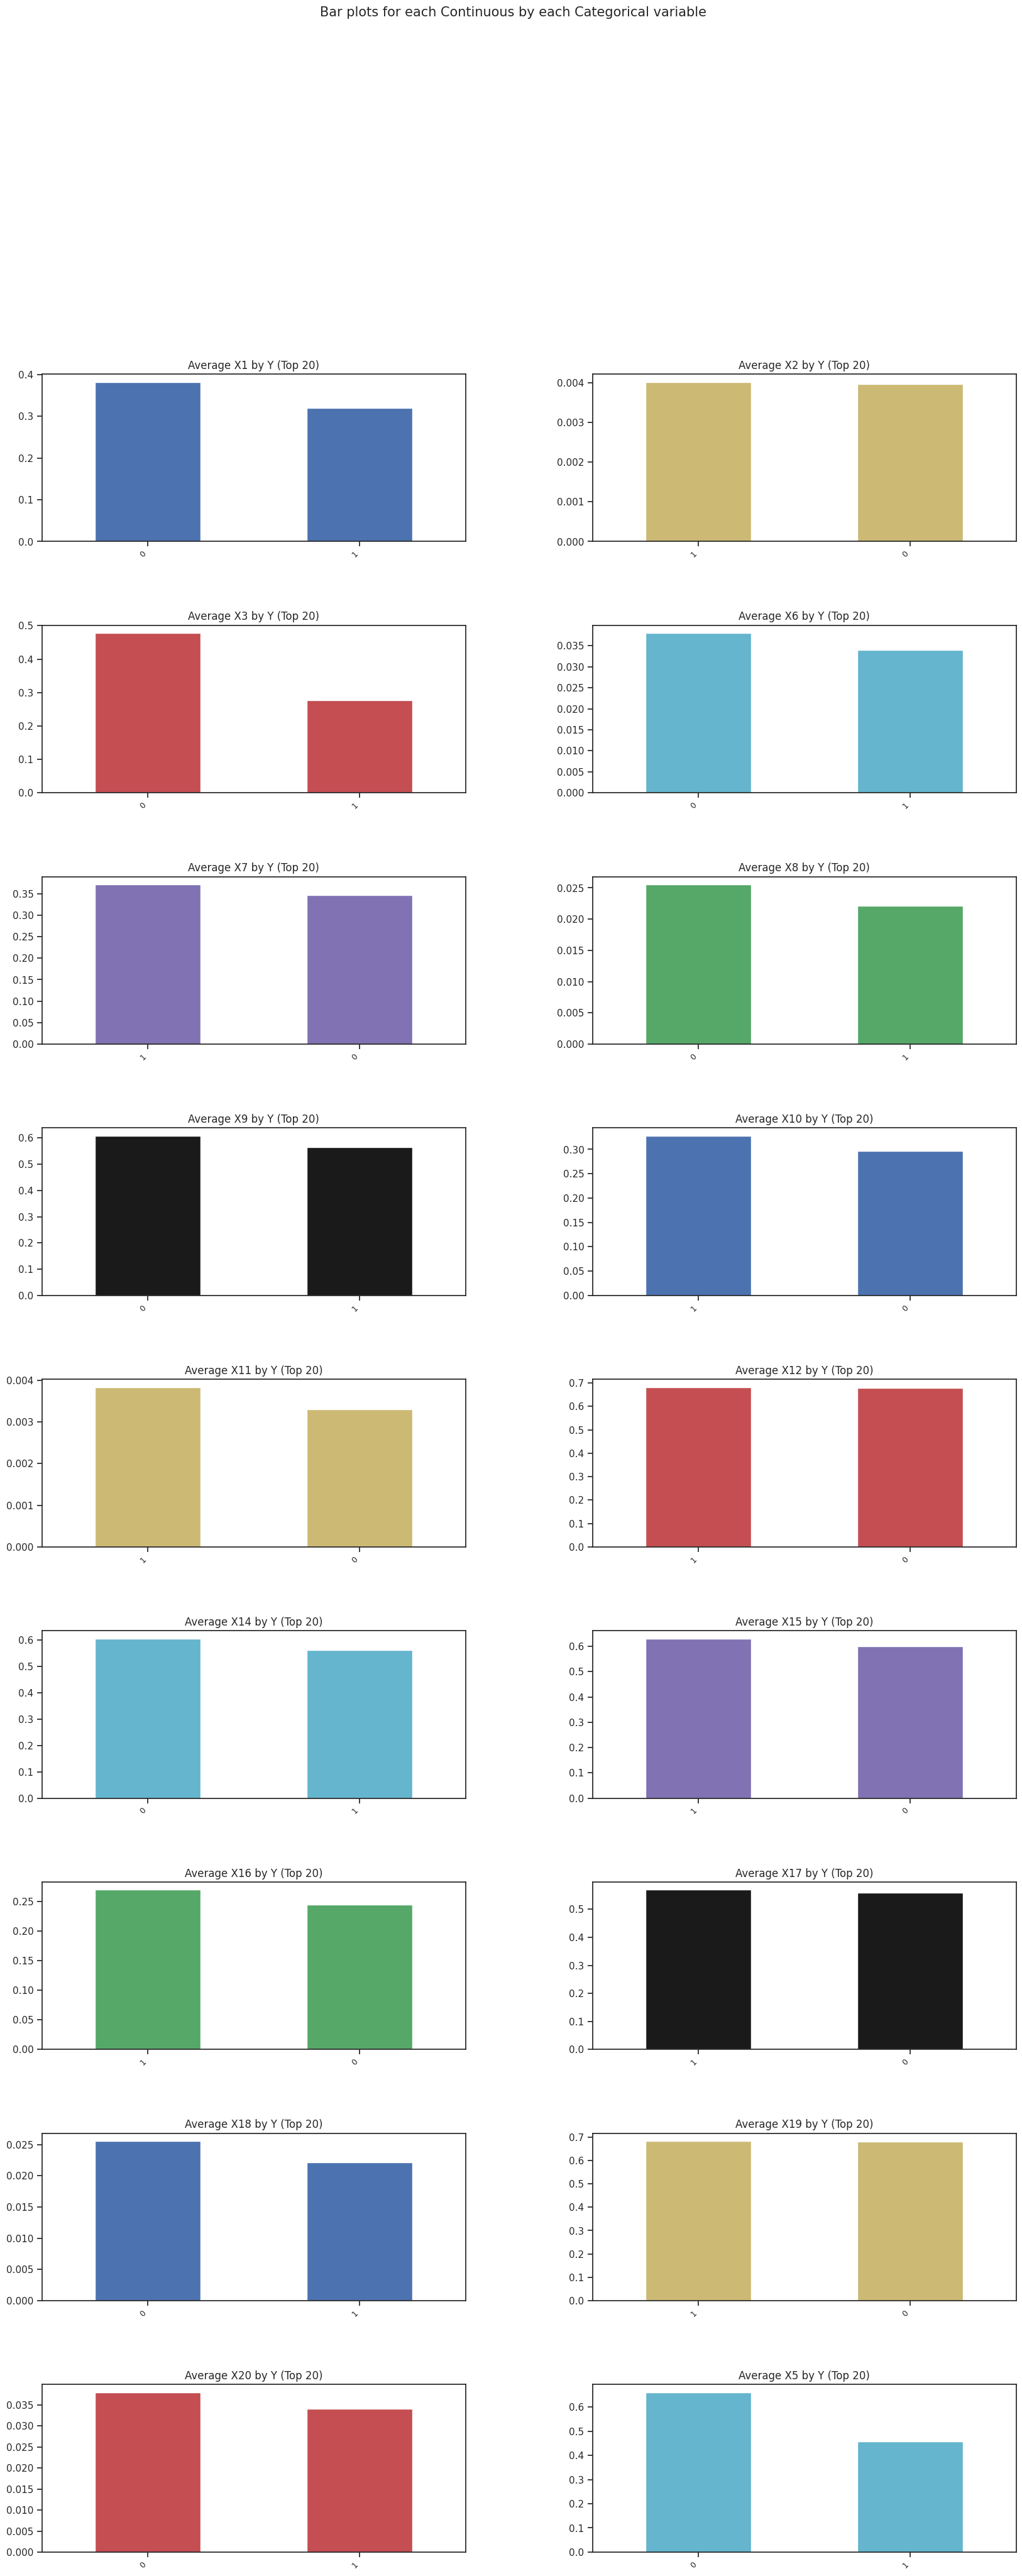

All Plots done
Time to run AutoViz = 155 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


X1        X2        X3        X4        X5        X6        X7     \
45932   0.079145  0.002122  0.561603  0.015348  0.688810  0.024516  0.343682   
174916  0.052109  0.005240  0.558378  0.015348  0.405465  0.048563  0.344670   
394303  0.623933  0.003459  0.419047  0.015348  0.693147  0.035175  0.346799   
382798  0.536627  0.002182  0.433301  0.015348  0.693147  0.025903  0.346983   
451822  0.183638  0.002206  0.575317  0.015348  0.693147  0.025104  0.344228   
...          ...       ...       ...       ...       ...       ...       ...   
71501   0.117772  0.005377  0.415907  0.015348  0.693147  0.051476  0.346337   
476506  0.049564  0.003336  0.397614  0.015348  0.693147  0.028419  0.342233   
475155  0.399744  0.004273  0.000000  0.015348  0.000000  0.035636  0.346065   
271299  0.551923  0.006671  0.575388  0.015348  0.693147  0.060711  0.347808   
267625  0.383182  0.002488  0.568803  0.015348  0.693147  0.026801  0.347174   

           X8        X9        X10       X11       X12       X13       X14    \
45932   0.024433  0.670674  0.296769  0.002003  0.683099  0.249262  0.659246   
174916  0.028100  0.647685  0.296135  0.004193  0.677709  0.249262  0.635989   
394303  0.026490  0.562785  0.298255  0.002838  0.671146  0.249262  0.562785   
382798  0.017725  0.624154  0.296638  0.001997  0.682985  0.249262  0.624154   
451822  0.026452  0.659246  0.296135  0.001819  0.685335  0.249262  0.647685   
...          ...       ...       ...       ...       ...       ...       ...   
71501   0.028223  0.600057  0.296505  0.004326  0.666371  0.249262  0.600057   
476506  0.024778  0.659246  0.295929  0.003072  0.686356  0.249262  0.647685   
475155  0.017663  0.510826  0.295929  0.004039  0.682957  0.249262  0.524071   
271299  0.028316  0.537143  0.297288  0.005147  0.671508  0.249262  0.537143   
267625  0.018258  0.612178  0.296689  0.002083  0.683639  0.249262  0.612178   

           X15       X16       X17       X18       X19       X20    Y  
45932   0.654959  0.243152  0.557528  0.024433  0.683099  0.024516  0  
174916  0.675381  0.243640  0.557720  0.028100  0.677709  0.048563  0  
394303  0.631444  0.244729  0.559348  0.026490  0.671146  0.035175  0  
382798  0.619911  0.245235  0.556289  0.017725  0.682985  0.025903  0  
451822  0.638519  0.243227  0.556679  0.026452  0.685335  0.025104  0  
...          ...       ...       ...       ...       ...       ... ..  
71501   0.685865  0.244616  0.559252  0.028223  0.666371  0.051476  0  
476506  0.637721  0.241008  0.556252  0.024778  0.686356  0.028419  1  
475155  0.613330  0.243546  0.557747  0.017663  0.682957  0.035636  1  
271299  0.683911  0.245640  0.559530  0.028316  0.671508  0.060711  0  
267625  0.618597  0.245141  0.556433  0.018258  0.683639  0.026801  0  

[150000 rows x 21 columns]

In [ ]:
AutoViz_Class().AutoViz('/content/drive/MyDrive/lsda02/data/week1.csv')

In [ ]:
pip install autoviz

# 데이터 불균형

In [ ]:
df

X1        X3        X5        X6        X7        X8        X9  \
0       0.202296  0.411261  0.693147  0.036360  0.343512  0.028087  0.681974   
1       0.006836  0.597304  0.686838  0.067407  0.347869  0.028640  0.497403   
2       0.609621  0.466186  0.693090  0.018944  0.345032  0.024502  0.647685   
3       0.074007  0.535876  0.693147  0.031475  0.347502  0.025393  0.587787   
4       0.198356  0.416238  0.686838  0.061888  0.347441  0.028450  0.537143   
...          ...       ...       ...       ...       ...       ...       ...   
526995  0.612937  0.401400  0.693147  0.015237  0.346218  0.020338  0.470004   
526996  0.512265  0.395505  0.688810  0.021745  0.342540  0.024307  0.681974   
526997  0.390334  0.415327  0.693147  0.068450  0.451511  0.028167  0.470004   
526998  0.512265  0.394744  0.688810  0.020826  0.341926  0.024307  0.693147   
526999  0.118755  0.398373  0.510595  0.028349  0.343154  0.025920  0.647685   

             X10       X11       X12       X14       X15       X16       X17  \
0       0.295769  0.003053  0.682731  0.681974  0.016330  0.242926  0.557461   
1       0.297943  0.005816  0.680891  0.497403  0.670040  0.245876  0.561336   
2       0.298255  0.001475  0.685525  0.647685  0.648486  0.243602  0.559431   
3       0.296057  0.002462  0.677980  0.575364  0.632563  0.246078  0.556761   
4       0.298167  0.005314  0.673286  0.537143  0.671124  0.245505  0.561695   
...          ...       ...       ...       ...       ...       ...       ...   
526995  0.298167  0.001164  0.679403  0.483797  0.664080  0.243377  0.561398   
526996  0.297209  0.002300  0.687581  0.670674  0.658006  0.240500  0.555487   
526997  0.599760  0.007902  0.680428  0.456017  0.682601  0.693147  0.693040   
526998  0.296889  0.002346  0.689263  0.681974  0.658006  0.240500  0.557215   
526999  0.297209  0.003069  0.683904  0.635989  0.627492  0.241516  0.559431   

        Y  
0       0  
1       0  
2       0  
3       0  
4       0  
...    ..  
526995  1  
526996  1  
526997  1  
526998  1  
526999  1  

[518762 rows x 15 columns]

Class distribution in the target variable 'Y':
Y
0    463335
1     55427
Name: count, dtype: int64


<ipython-input-16-ff6d3ffe3a73>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')


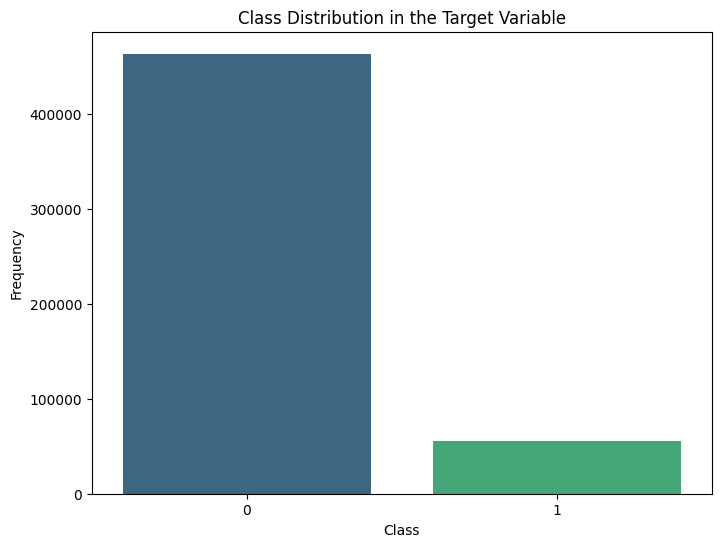

In [ ]:
# 목표 변수(y) 분포 확인
target_distribution = df['Y'].value_counts()

# 분포 출력
print("Class distribution in the target variable 'Y':")
print(target_distribution)

# 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Class Distribution in the Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# 모델준비

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

In [ ]:
from pycaret.classification import *
setup_clf = setup(df, target = 'Y', session_id = 42)

In [ ]:
from pycaret.classification import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df, target = 'Y',
                  train_size = 0.7,
                  # encoding_method = None,
                  normalize = True,
                  normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X')

X1        X3        X5        X6        X7        X8        X9  \
447687  0.336213  0.427509  0.693147  0.062548  0.347594  0.028542  0.537143   
11713   0.645809  0.493514  0.693147  0.050695  0.345419  0.028320  0.635989   
429757  0.149117  0.425298  0.504250  0.035655  0.348374  0.017808  0.470004   
422401  0.524139  0.416486  0.693147  0.023888  0.346546  0.017737  0.624154   
38680   0.582627  0.409347  0.510595  0.028723  0.345269  0.028150  0.635989   
...          ...       ...       ...       ...       ...       ...       ...   
361778  0.246661  0.559813  0.510595  0.032251  0.346646  0.017357  0.612178   
487084  0.399744  0.000000  0.000000  0.039477  0.346830  0.017663  0.497403   
424484  0.339038  0.413006  0.693147  0.039605  0.343614  0.028017  0.670674   
368185  0.360888  0.417313  0.693147  0.046125  0.345300  0.028018  0.635989   
140428  0.081096  0.569584  0.693147  0.033735  0.343220  0.027618  0.693147   

             X10       X11       X12       X14       X15       X16       X17  
447687  0.298007  0.005288  0.675521  0.524071  0.677135  0.245876  0.559800  
11713   0.297408  0.004410  0.672963  0.635989  0.669532  0.244560  0.556381  
429757  0.296249  0.002868  0.670380  0.497403  0.611535  0.246040  0.560968  
422401  0.296793  0.001898  0.684441  0.624154  0.619796  0.244953  0.556351  
38680   0.297368  0.002249  0.675228  0.624154  0.625706  0.244155  0.559800  
...          ...       ...       ...       ...       ...       ...       ...  
361778  0.297209  0.002681  0.670353  0.612178  0.622968  0.245302  0.557182  
487084  0.295897  0.004576  0.678578  0.497403  0.613330  0.244391  0.556228  
424484  0.297652  0.003453  0.685967  0.659246  0.692285  0.242769  0.557993  
368185  0.295174  0.003934  0.670873  0.624154  0.687424  0.244053  0.557429  
140428  0.294435  0.002939  0.682110  0.681974  0.024761  0.242556  0.556450  

[518762 rows x 14 columns]

In [ ]:
get_config('y')

447687    0
11713     0
429757    0
422401    0
38680     0
         ..
361778    0
487084    1
424484    0
368185    0
140428    0
Name: Y, Length: 518762, dtype: int8

In [ ]:
get_config('X_train')

X1        X3        X5        X6        X7        X8        X9  \
447687  0.336213  0.427509  0.693147  0.062548  0.347594  0.028542  0.537143   
11713   0.645809  0.493514  0.693147  0.050695  0.345419  0.028320  0.635989   
429757  0.149117  0.425298  0.504250  0.035655  0.348374  0.017808  0.470004   
422401  0.524139  0.416486  0.693147  0.023888  0.346546  0.017737  0.624154   
38680   0.582627  0.409347  0.510595  0.028723  0.345269  0.028150  0.635989   
...          ...       ...       ...       ...       ...       ...       ...   
510504  0.012812  0.399804  0.693147  0.037658  0.345300  0.025625  0.562785   
378112  0.063186  0.417313  0.693147  0.034129  0.347136  0.025511  0.587787   
333492  0.525700  0.529469  0.510595  0.029432  0.346043  0.028262  0.624154   
429584  0.624836  0.448237  0.693147  0.035191  0.347186  0.026507  0.562785   
108398  0.134431  0.411926  0.693147  0.022001  0.347288  0.020507  0.587787   

             X10       X11       X12       X14       X15       X16       X17  
447687  0.298007  0.005288  0.675521  0.524071  0.677135  0.245876  0.559800  
11713   0.297408  0.004410  0.672963  0.635989  0.669532  0.244560  0.556381  
429757  0.296249  0.002868  0.670380  0.497403  0.611535  0.246040  0.560968  
422401  0.296793  0.001898  0.684441  0.624154  0.619796  0.244953  0.556351  
38680   0.297368  0.002249  0.675228  0.624154  0.625706  0.244155  0.559800  
...          ...       ...       ...       ...       ...       ...       ...  
510504  0.298486  0.004316  0.684259  0.562785  0.632223  0.242870  0.555981  
378112  0.295952  0.002628  0.675755  0.575364  0.632498  0.245640  0.556460  
333492  0.297368  0.002382  0.671379  0.612178  0.625176  0.244931  0.559389  
429584  0.298326  0.002766  0.671700  0.562785  0.631452  0.245291  0.559505  
108398  0.296921  0.001735  0.682719  0.587787  0.616852  0.245548  0.556549  

[363133 rows x 14 columns]

In [ ]:
get_config('y_train')

447687    0
11713     0
429757    0
422401    0
38680     0
         ..
510504    1
378112    0
333492    0
429584    0
108398    0
Name: Y, Length: 363133, dtype: int8

In [ ]:
get_config('X_test')

X1        X3        X5        X6        X7        X8        X9  \
333452  0.318210  0.416486  0.504250  0.033087  0.347900  0.018187  0.510826   
219481  0.627096  0.577643  0.504250  0.058056  0.349493  0.020668  0.382992   
108109  0.586059  0.527620  0.693147  0.056908  0.347136  0.028359  0.550046   
66212   0.281715  0.558952  0.693147  0.027699  0.345912  0.025092  0.624154   
95788   0.418354  0.409097  0.693147  0.038854  0.343860  0.027943  0.670674   
...          ...       ...       ...       ...       ...       ...       ...   
361778  0.246661  0.559813  0.510595  0.032251  0.346646  0.017357  0.612178   
487084  0.399744  0.000000  0.000000  0.039477  0.346830  0.017663  0.497403   
424484  0.339038  0.413006  0.693147  0.039605  0.343614  0.028017  0.670674   
368185  0.360888  0.417313  0.693147  0.046125  0.345300  0.028018  0.635989   
140428  0.081096  0.569584  0.693147  0.033735  0.343220  0.027618  0.693147   

             X10       X11       X12       X14       X15       X16       X17  
333452  0.295809  0.002572  0.669062  0.537143  0.612694  0.245539  0.560317  
219481  0.296142  0.004785  0.680071  0.382992  0.609970  0.247426  0.560538  
108109  0.297368  0.004954  0.674159  0.550046  0.684211  0.245066  0.560115  
66212   0.295403  0.002171  0.677024  0.624154  0.633875  0.245018  0.558324  
95788   0.297688  0.003428  0.685622  0.670674  0.692865  0.242972  0.558077  
...          ...       ...       ...       ...       ...       ...       ...  
361778  0.297209  0.002681  0.670353  0.612178  0.622968  0.245302  0.557182  
487084  0.295897  0.004576  0.678578  0.497403  0.613330  0.244391  0.556228  
424484  0.297652  0.003453  0.685967  0.659246  0.692285  0.242769  0.557993  
368185  0.295174  0.003934  0.670873  0.624154  0.687424  0.244053  0.557429  
140428  0.294435  0.002939  0.682110  0.681974  0.024761  0.242556  0.556450  

[155629 rows x 14 columns]

In [ ]:
get_config('y_test')

333452    0
219481    0
108109    0
66212     0
95788     0
         ..
361778    0
487084    1
424484    0
368185    0
140428    0
Name: Y, Length: 155629, dtype: int8

In [ ]:
get_config('X_train_transformed')

X1        X3        X5        X6        X7        X8        X9  \
447687 -0.192361 -0.265661  0.389432  1.829672 -0.016708  0.967644 -0.961501   
11713   1.358278  0.361383  0.389432  0.977760 -0.096933  0.903786  0.464358   
429757 -1.129448 -0.286669 -0.964677 -0.103255  0.012071 -2.119287 -1.929991   
422401  0.748882 -0.370384  0.389432 -0.949039 -0.055366 -2.139896  0.293645   
38680   1.041825 -0.438207 -0.919192 -0.601493 -0.102444  0.855018  0.464358   
...          ...       ...       ...       ...       ...       ...       ...   
510504 -1.812144 -0.528865  0.389432  0.040694 -0.101314  0.128630 -0.591607   
378112 -1.559838 -0.362528  0.389432 -0.212954 -0.033613  0.095861 -0.230961   
333492  0.756704  0.702949 -0.919192 -0.550585 -0.073903  0.887019  0.293645   
429584  1.253233 -0.068748  0.389432 -0.136648 -0.031743  0.382489 -0.591607   
108398 -1.203001 -0.413703  0.389432 -1.084643 -0.027977 -1.343174 -0.230961   

             X10       X11       X12       X14       X15       X16       X17  
447687 -0.052232  0.911854 -0.886171 -1.232077  0.441301 -0.028139  0.046007  
11713  -0.071200  0.522018 -1.386618  0.525261  0.395107 -0.074603 -0.232051  
429757 -0.107906 -0.163023 -1.892139 -1.650823  0.042746 -0.022330  0.140945  
422401 -0.090687 -0.594047  0.859355  0.339436  0.092934 -0.060705 -0.234460  
38680  -0.072466 -0.438423 -0.943530  0.339436  0.128842 -0.088912  0.046007  
...          ...       ...       ...       ...       ...       ...       ...  
510504 -0.037065  0.480293  0.823665 -0.624181  0.168432 -0.134262 -0.264563  
378112 -0.117319 -0.270006 -0.840416 -0.426668  0.170107 -0.036475 -0.225629  
333492 -0.072466 -0.379125 -1.696628  0.151386  0.125618 -0.061492  0.012603  
429584 -0.042121 -0.208472 -1.633763 -0.624181  0.163750 -0.048790  0.022006  
108398 -0.086637 -0.666619  0.522368 -0.231610  0.075050 -0.039714 -0.218403  

[363133 rows x 14 columns]

In [ ]:
get_config('X_test_transformed')

X1        X3        X5        X6        X7        X8        X9  \
333452 -0.282528 -0.370384 -0.964677 -0.287820 -0.005442 -2.010403 -1.341131   
219481  1.264554  1.160602 -0.964677  1.506810  0.053334 -1.296741 -3.185137   
108109  1.059016  0.685386  0.389432  1.424339 -0.033613  0.915176 -0.775369   
66212  -0.465317  0.983041  0.389432 -0.675091 -0.078734 -0.024469  0.293645   
95788   0.219053 -0.440581  0.389432  0.126634 -0.154434  0.795274  0.964700   
...          ...       ...       ...       ...       ...       ...       ...   
361778 -0.640886  0.991215 -0.919192 -0.347939 -0.051655 -2.249130  0.120888   
487084  0.125842 -4.326979 -4.579385  0.171432 -0.044888 -2.161066 -1.534759   
424484 -0.178211 -0.403446  0.389432  0.180618 -0.163483  0.816613  0.964700   
368185 -0.068772 -0.362528  0.389432  0.649241 -0.101314  0.817039  0.464358   
140428 -1.470137  1.084044  0.389432 -0.241249 -0.178035  0.701793  1.288872   

             X10       X11       X12       X14       X15       X16       X17  
333452 -0.121839 -0.294507 -2.150096 -1.026819  0.049783 -0.040047  0.087994  
219481 -0.111289  0.688554  0.004215 -3.447296  0.033232  0.026586  0.105980  
108109 -0.072466  0.763450 -1.152560 -0.824210  0.484294 -0.056725  0.071602  
66212  -0.134694 -0.472926 -0.592034  0.339436  0.178474 -0.058430 -0.074071  
95788  -0.062347  0.085558  1.090369  1.069894  0.536869 -0.130680 -0.094108  
...          ...       ...       ...       ...       ...       ...       ...  
361778 -0.077526 -0.246338 -1.897411  0.151386  0.112207 -0.048385 -0.166857  
487084 -0.119052  0.595795 -0.287891 -1.650823  0.053650 -0.080564 -0.244493  
424484 -0.063480  0.096538  1.157911  0.890440  0.533344 -0.137844 -0.100918  
368185 -0.141945  0.310511 -1.795672  0.339436  0.503812 -0.092490 -0.146811  
140428 -0.165372 -0.131688  0.403192  1.247320 -3.522242 -0.145358 -0.226429  

[155629 rows x 14 columns]

In [ ]:
get_config('variable_and_property_keys')

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['X1', 'X3', 'X5', 'X6', 'X7', 'X8',
                                             'X9', 'X10', 'X11', 'X12', 'X14',
                                             'X15', 'X16', 'X17'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)))],
         verbose=False)

## 모델 비교

In [ ]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [ ]:
best = compare_models(sort='F1')
# 여기에서 내가 중요하게 보고자하는 것을 봐야

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

### 모델 분석

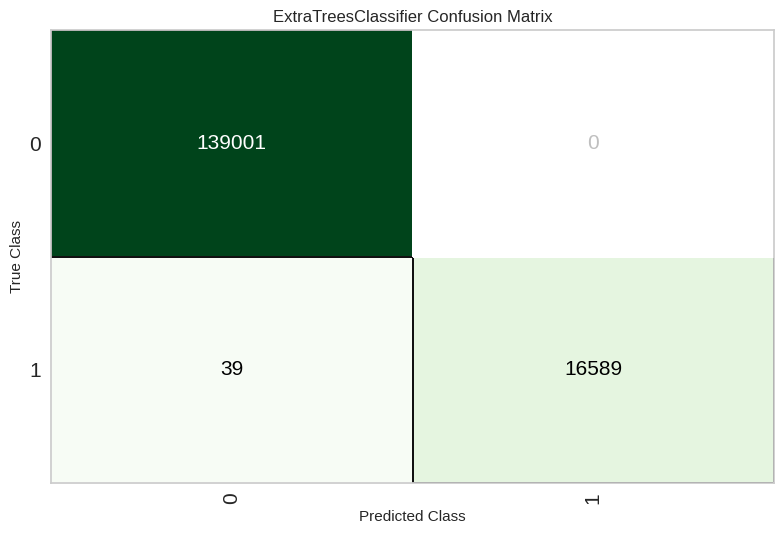

In [ ]:
plot_model(best, plot = 'confusion_matrix')

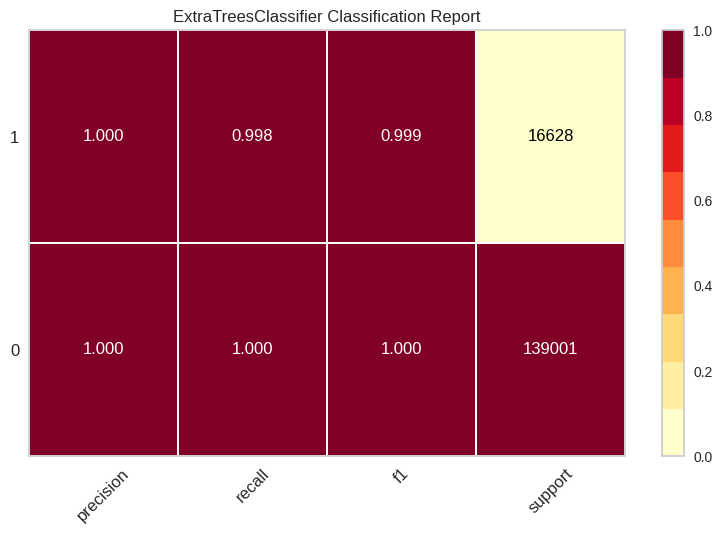

In [ ]:
plot_model(best, plot = 'class_report')

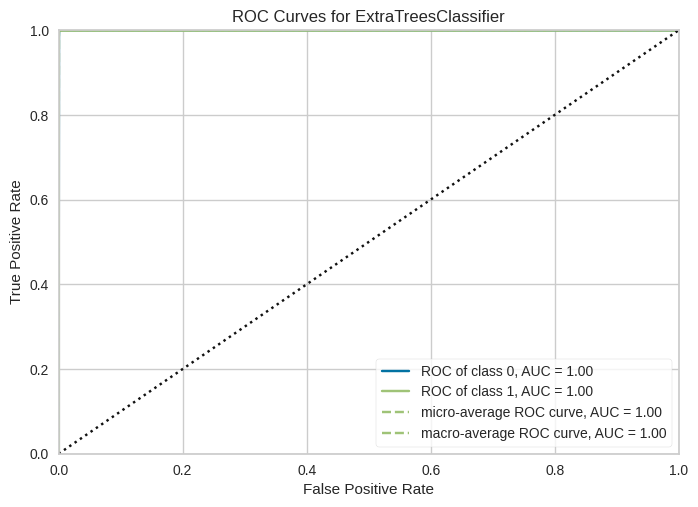

In [ ]:
plot_model(best, plot = 'auc')

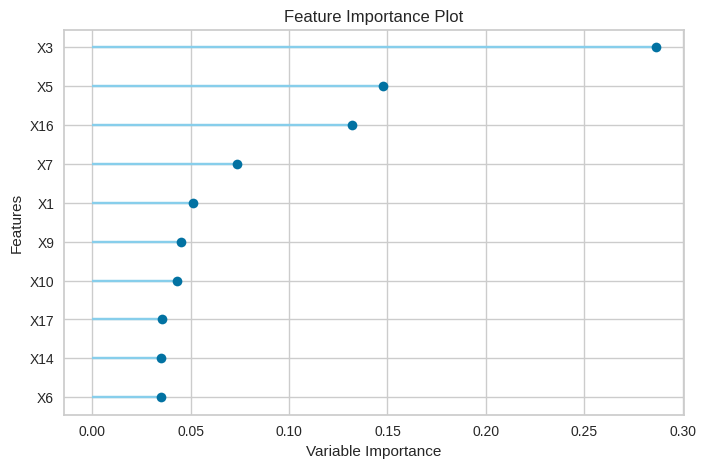

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 예측

In [ ]:
pred = predict_model(best)

In [ ]:
pred.head()

X1        X3        X5        X6        X7        X8        X9  \
333452  0.318210  0.416486  0.504250  0.033087  0.347900  0.018187  0.510826   
219481  0.627096  0.577643  0.504250  0.058056  0.349493  0.020668  0.382992   
108109  0.586059  0.527620  0.693147  0.056908  0.347136  0.028359  0.550046   
66212   0.281715  0.558952  0.693147  0.027699  0.345912  0.025092  0.624154   
95788   0.418354  0.409097  0.693147  0.038854  0.343860  0.027943  0.670674   

             X10       X11       X12       X14       X15       X16       X17  \
333452  0.295809  0.002572  0.669062  0.537143  0.612694  0.245539  0.560317   
219481  0.296142  0.004785  0.680071  0.382992  0.609970  0.247426  0.560538   
108109  0.297368  0.004954  0.674159  0.550046  0.684211  0.245066  0.560115   
66212   0.295403  0.002171  0.677024  0.624154  0.633875  0.245018  0.558324   
95788   0.297688  0.003428  0.685622  0.670674  0.692865  0.242972  0.558077   

        Y  prediction_label  prediction_score  
333452  0                 0               1.0  
219481  0                 0               1.0  
108109  0                 0               1.0  
66212   0                 0               1.0  
95788   0                 0               1.0

### 모델 해석

In [ ]:
clf = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
! pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
# SHAP 설치
!pip install shap

# PyCaret 분석 관련 디펜던시 설치
!pip install pycaret[analysis]


In [ ]:
interpret_model(clf, plot = 'summary')
# 쓰면좋음

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [ ]:
help(interpret_model)